In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [36]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

### 엑셀 20만개 넘어가면 느림 - parquet 변환

In [37]:
df = pd.read_excel('datasets/Online Retail.xlsx')

In [38]:
df = df.astype(str)

In [39]:
df.to_parquet('my_data.parquet')

# ArrowInvalid: ("Could not convert 'C536379' with type str: tried to convert to int64", 'Conversion failed for column InvoiceNo with type object')
# InvoiceNo 에 취소하면 C가 붙는데 int로 인식을 못햇 오류
# df.astype(str) : 문자열로 전부 변환하고 다시 astype

### 데이터 미리보기 및 요약

In [40]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [41]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.1,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   InvoiceNo    541909 non-null  object
 1   StockCode    541909 non-null  object
 2   Description  541909 non-null  object
 3   Quantity     541909 non-null  object
 4   InvoiceDate  541909 non-null  object
 5   UnitPrice    541909 non-null  object
 6   CustomerID   541909 non-null  object
 7   Country      541909 non-null  object
dtypes: object(8)
memory usage: 33.1+ MB


In [43]:
df['InvoiceNo'] = df['InvoiceNo'].astype('category')
df['StockCode'] = df['StockCode'].astype('category')
df['Description'] = df['Description'].astype('category')
df['Quantity'] = df['Quantity'].astype('int32')
df['InvoiceDate'] = df['InvoiceDate'].astype('category')
df['UnitPrice'] = df['UnitPrice'].astype('float64')
df['CustomerID'] = df['CustomerID'].astype('float32')
df['Country'] = df['Country'].astype('category')

In [44]:
df.info()

# CustomerID : 결측값 O
# InvoiceDate : dt 변환

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  541909 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
dtypes: category(5), float32(1), float64(1), int32(1)
memory usage: 15.1 MB


### 칼럼
- InvoiceNo : 송장번호, 6자리 정수, 'c'로 시작하면 취소
- StockCode : 제품코드, 5자리 정수
- Description : 제품 이름
- Quantity : 거래당 각 제품의 수량, '-' 마이너스로 시작하면 취소
- InvoiceDate : 송장 날짜, 시간
- UnitPrice : 단가, 영국화폐단위
- CustomerID : 고객번호, 5자리 정수
- Country : 국가, 문자열

In [45]:
df.describe()

# 수치 타입만

# 플마 1.5IQR  하고 최소, 최대값 차이가 너무 남
# 이상치 많을 것으로 예상

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.689453
std,218.081158,96.759853,1713.600342
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [46]:
df.describe(exclude='number')

# 범주 타입만

# count : 총 개수
# unique : 중복 없이 고유한 값 개수
# top : 가장 많이 나타나는 거
# freq : top의 빈도

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,541909,541909,541909
unique,25900,4070,4224,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-10-31 14:41:00,United Kingdom
freq,1114,2313,2369,1114,495478


1. 주문 번호 (InvoiceNo)
    - 총 주문 건수: 541,909건
    - 고유한 주문 번호 수: 25,900개
    - 가장 자주 등장하는 주문 번호: 573585 (1,114번)
<br></br>
2. 상품 코드 (StockCode)
    - 총 상품 코드 수: 541,909개
    - 고유한 상품 코드 수: 4,070개
    - 가장 자주 등장하는 상품 코드: 85123A (2,313번)
<br></br>
3. 상품 설명 (Description)
    - 총 상품 설명 수: 541,909개
    - 고유한 상품 설명 수: 4,224개
    - 가장 자주 등장하는 상품 설명: WHITE HANGING HEART T-LIGHT HOLDER (2,369번)
<br></br>
4. 주문일자 (InvoiceDate)
    - 총 주문일자 수: 541,909개
    - 고유한 주문일자 수: 23,260개
    - 가장 자주 등장하는 주문일자: 2011-10-31 14:41:00 (1,114번)
<br></br>
5. 국가 (Country)
    - 총 국가 수: 541,909개
    - 고유한 국가 수: 38개
    - 가장 자주 등장하는 국가: United Kingdom (495,478번)

### 결측치

In [47]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [48]:
df.isnull().mean() * 100

# 전체의 약 25% 비회원 주문으로 추정

InvoiceNo       0.000000
StockCode       0.000000
Description     0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

### 수치형 히스토그램

In [49]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.689453
std,218.081158,96.759853,1713.600342
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CustomerID'}>, <Axes: >]], dtype=object)

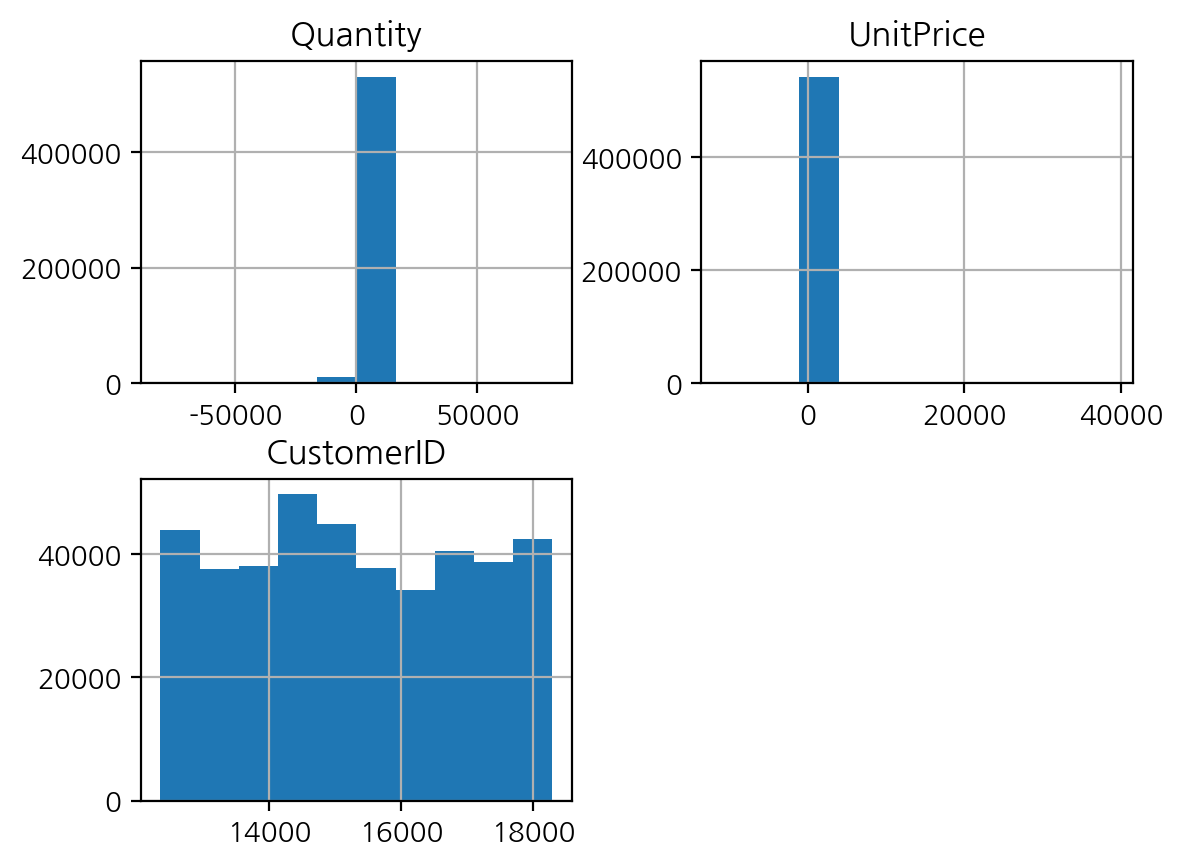

In [50]:
df.hist()

<Axes: >

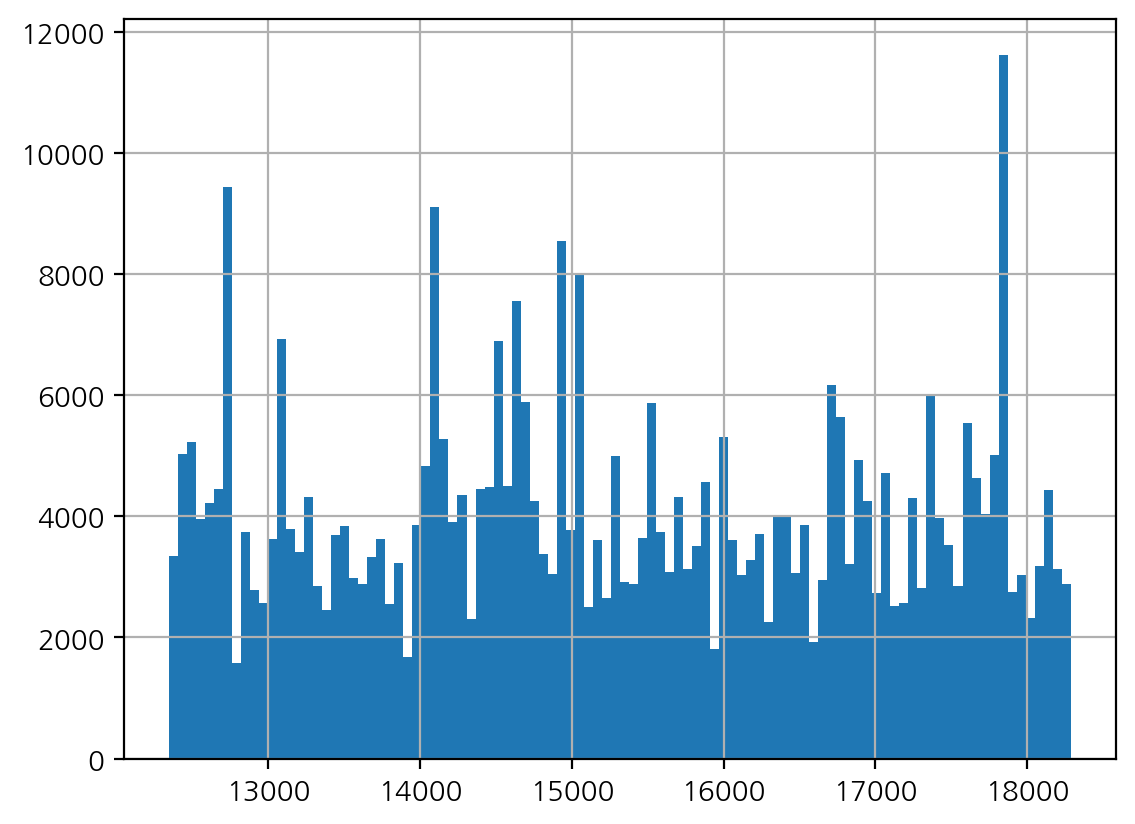

In [51]:
df['CustomerID'].hist(bins=100)

# 결제 빈도 높은 고객

### 전체 주문금액 변수 생성
- RFM 중 MonetaryValue 값

In [52]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### 회원 vs 비회원 구매

In [53]:
df['CustomerID'].isnull().value_counts(1)

# value_counts(1) : normalize=True 하고 똑같음

CustomerID
False    0.750733
True     0.249267
Name: proportion, dtype: float64

In [54]:
df['Country'][~df['CustomerID'].isnull()==False].value_counts()

# 시리즈 앞에 '~' 넣으면 반대 조건 나옴

# df.loc[df['CustomerID'].notnull(), 'Country'].value_counts()

Country
United Kingdom          133600
EIRE                       711
Hong Kong                  288
Unspecified                202
Switzerland                125
France                      66
Israel                      47
Portugal                    39
Bahrain                      2
United Arab Emirates         0
Netherlands                  0
Norway                       0
Poland                       0
RSA                          0
USA                          0
Saudi Arabia                 0
Lithuania                    0
Singapore                    0
Spain                        0
Sweden                       0
Malta                        0
Australia                    0
Lebanon                      0
Japan                        0
Austria                      0
Iceland                      0
Greece                       0
Germany                      0
Finland                      0
European Community           0
Denmark                      0
Czech Republic               0


In [55]:
df['isRegistered'] = df['CustomerID'].notnull()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,True
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True


In [56]:
pd.crosstab(df['Country'], df['isRegistered']).sort_values(True, ascending=False)

isRegistered,False,True
Country,,
United Kingdom,133600,361878
Germany,0,9495
France,66,8491
EIRE,711,7485
Spain,0,2533
Netherlands,0,2371
Belgium,0,2069
Switzerland,125,1877
Portugal,39,1480


### 구매 취소 비율

In [57]:
df['InvoiceNo'].str.contains('C').value_counts()

InvoiceNo
False    532621
True       9288
Name: count, dtype: int64

In [58]:
len(df[df['InvoiceNo'].str.contains('C') == True]) / len(df)

0.017139409015166755

In [59]:
df['InvoiceCode'] = df['InvoiceNo'].str.replace("[0-9]", '', regex=True)
df['InvoiceCode'].value_counts()

InvoiceCode
     532618
C      9288
A         3
Name: count, dtype: int64

In [60]:
df['isCancel'] = (df['InvoiceCode'] == 'C')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,True,,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,True,,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False


In [61]:
pd.crosstab(df['isRegistered'], df['InvoiceCode'])

# 회원가입 여부에 따른 취소 빈도

InvoiceCode,,A,C
isRegistered,,,
False,134694,3,383
True,397924,0,8905


In [62]:
df[df['InvoiceCode'] == 'A']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,11062.06,False,A,False
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,-11062.06,False,A,False
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,-11062.06,False,A,False


In [63]:
customer_cancel = pd.crosstab(df['CustomerID'], df['isCancel'])
customer_cancel.columns = ['정상','취소']
customer_cancel['취소비율'] = customer_cancel['취소'] / customer_cancel['정상']
customer_cancel.nlargest(10, '취소비율')

,정상,취소,취소비율
CustomerID,,,
12503.0,0,1,inf
12505.0,0,1,inf
12605.0,0,3,inf
12666.0,0,2,inf
12870.0,0,2,inf
12943.0,0,1,inf
13154.0,0,1,inf
13693.0,0,4,inf
13829.0,0,1,inf


In [64]:
customer_cancel.nlargest(10, '취소')

,정상,취소,취소비율
CustomerID,,,
14911.0,5677,226,0.039810
17841.0,7847,136,0.017331
17511.0,963,113,0.117342
15311.0,2379,112,0.047079
12607.0,101,101,1.000000
14410.0,194,93,0.479381
13798.0,349,90,0.257880
14606.0,2700,82,0.030370
13113.0,201,79,0.393035


array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'TotalPrice'}>]], dtype=object)

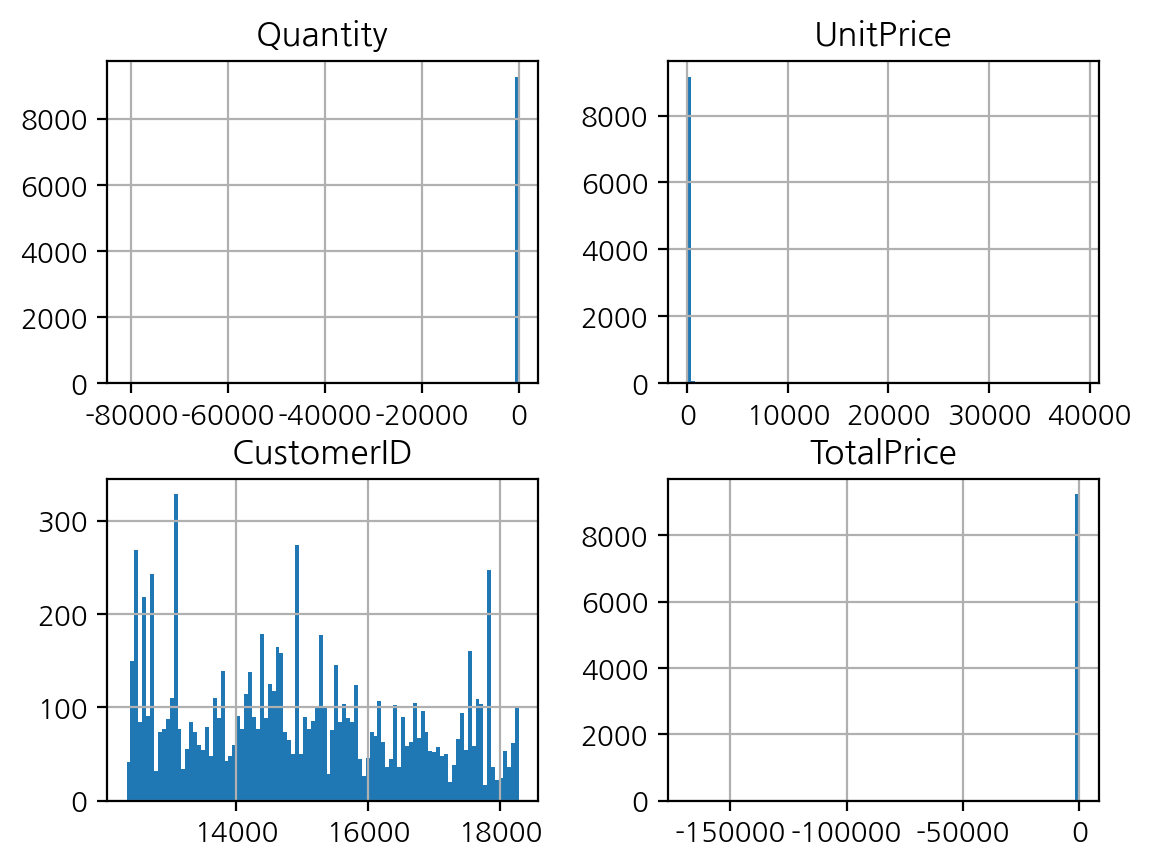

In [65]:
df[df['InvoiceCode'] == 'C'].hist(bins=100)

# 취소건 같은 경우 Quantity가 음수ㅠ

### 고객ID 없는 주문, 취소 주문 제외

In [66]:
df.shape

(541909, 12)

In [67]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,True,C,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,True,C,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,True,C,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,True,C,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,True,C,True
...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,True,C,True
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,True,C,True
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,True,C,True
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,True,C,True


In [68]:
df[(df['CustomerID'].notnull()) & (df['Quantity'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,True,C,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,True,C,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,True,C,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,True,C,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,True,C,True
...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,True,C,True
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,True,C,True
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,True,C,True
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,True,C,True


In [69]:
df.loc[(df['Quantity'] < 0) & (df['InvoiceCode'] != 'C'), 'Description'].value_counts()

Description
nan                             862
check                           120
damages                          45
damaged                          42
?                                41
                               ... 
FRYING PAN BLUE POLKADOT          0
FRYING PAN PINK POLKADOT          0
FRYING PAN RED POLKADOT           0
FRYING PAN RED RETROSPOT          0
MEMO BOARD RETROSPOT  DESIGN      0
Name: count, Length: 4224, dtype: int64

In [70]:
df.loc[(df['Quantity'] < 0) & (df['InvoiceCode'] != 'C'), 'Quantity'].describe()

count    1336.000000
mean     -154.907934
std       588.292456
min     -9600.000000
25%       -84.000000
50%       -30.000000
75%        -8.000000
max        -1.000000
Name: Quantity, dtype: float64

In [71]:
df_valid = df[(df['CustomerID'].notnull()) &
              (df['Quantity'] > 0) &
              (df['UnitPrice'] > 0)].copy()

df.shape, df_valid.shape

((541909, 12), (397884, 12))

In [72]:
df_valid.shape

(397884, 12)

### 중복 데이터 제거

In [73]:
df_valid = df_valid.drop_duplicates().copy()
df_valid.shape

(392692, 12)

### 날짜와 시간

In [74]:
df_valid['InvoiceDate'] = pd.to_datetime(df_valid['InvoiceDate'])
df_valid['InvoiceDate']
# dt 사용을 위해 타입 변경

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 392692, dtype: datetime64[ns]

In [75]:
df_valid['InvoiceYear'] = df_valid['InvoiceDate'].dt.year
df_valid['InvoiceMonth'] = df_valid['InvoiceDate'].dt.month
df_valid['InvoiceDay'] = df_valid['InvoiceDate'].dt.day
df_valid['InvoiceDow'] = df_valid['InvoiceDate'].dt.dayofweek

df_valid.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,True,,False,2010,12,1,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False,2010,12,1,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,True,,False,2010,12,1,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False,2010,12,1,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False,2010,12,1,2


In [76]:
df_valid['InvoiceYM'] = df_valid['InvoiceDate'].astype(str).str[:7]
df_valid

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceYM
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,True,,False,2010,12,1,2,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False,2010,12,1,2,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,True,,False,2010,12,1,2,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False,2010,12,1,2,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False,2010,12,1,2,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,True,,False,2011,12,9,4,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,True,,False,2011,12,9,4,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,True,,False,2011,12,9,4,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,True,,False,2011,12,9,4,2011-12


In [77]:
df_valid['InvoiceTime'] = df_valid['InvoiceDate'].dt.time
df_valid['InvoiceHour'] = df_valid['InvoiceDate'].dt.hour
df_valid.sample(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceYM,InvoiceTime,InvoiceHour
257466,559529,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-07-10 12:03:00,2.1,14808.0,United Kingdom,12.6,True,,False,2011,7,10,6,2011-07,12:03:00,12


<Axes: xlabel='InvoiceYear', ylabel='count'>

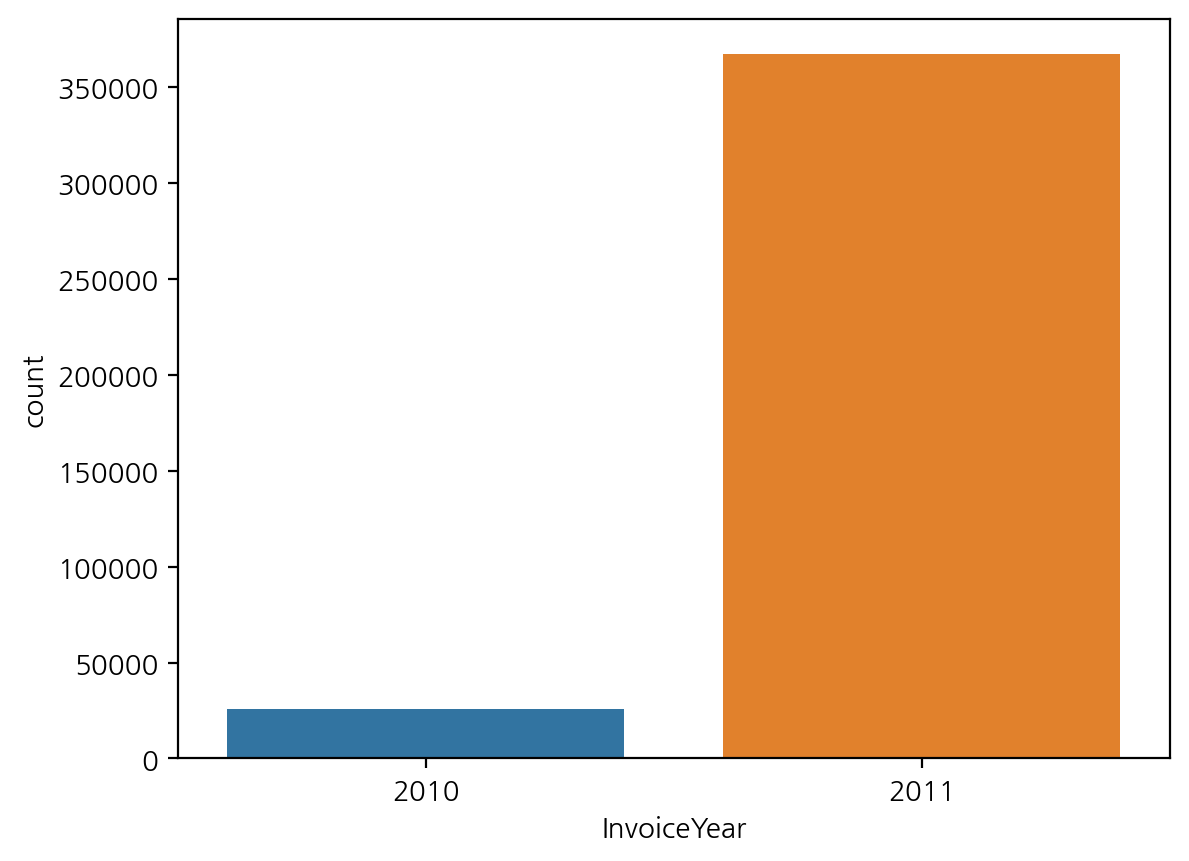

In [78]:
# 년도
sns.countplot(data=df_valid, x='InvoiceYear')

<Axes: xlabel='InvoiceMonth', ylabel='count'>

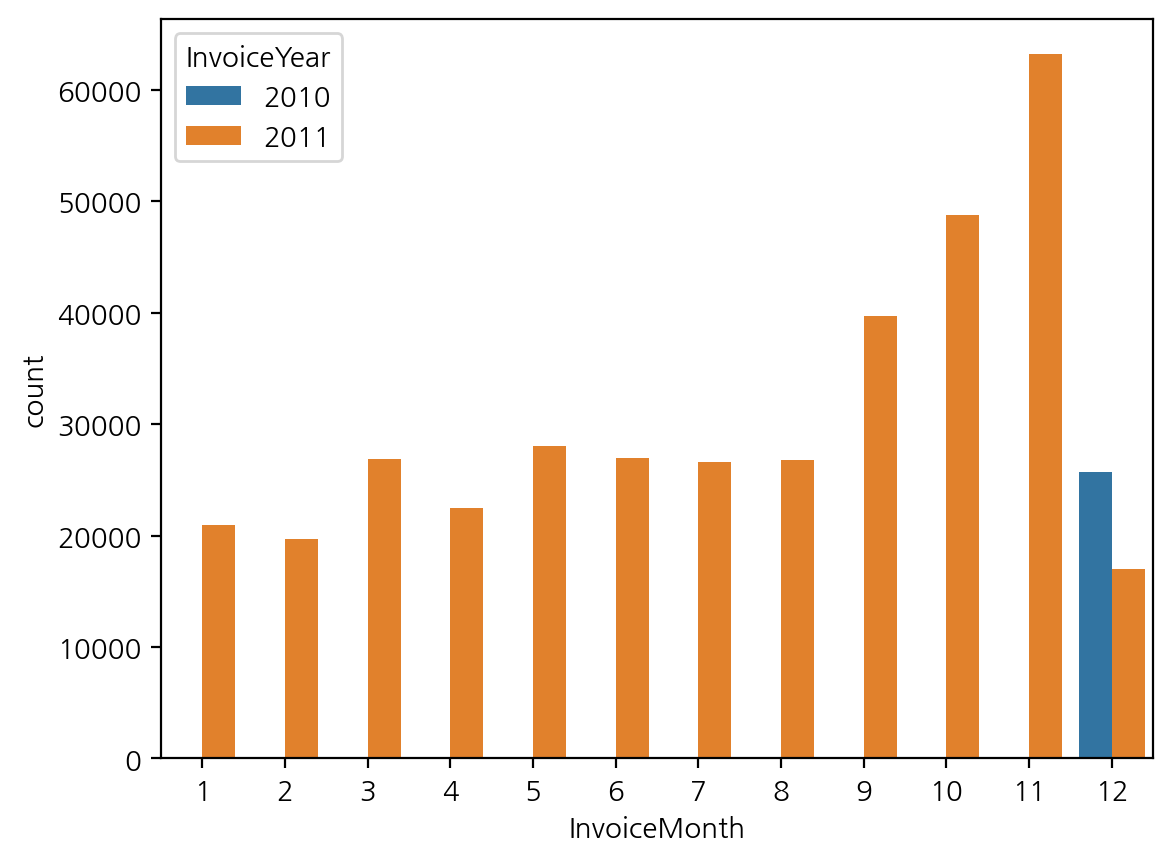

In [79]:
# 월별
sns.countplot(data=df_valid, x='InvoiceMonth', hue='InvoiceYear')

<Axes: xlabel='InvoiceYM', ylabel='count'>

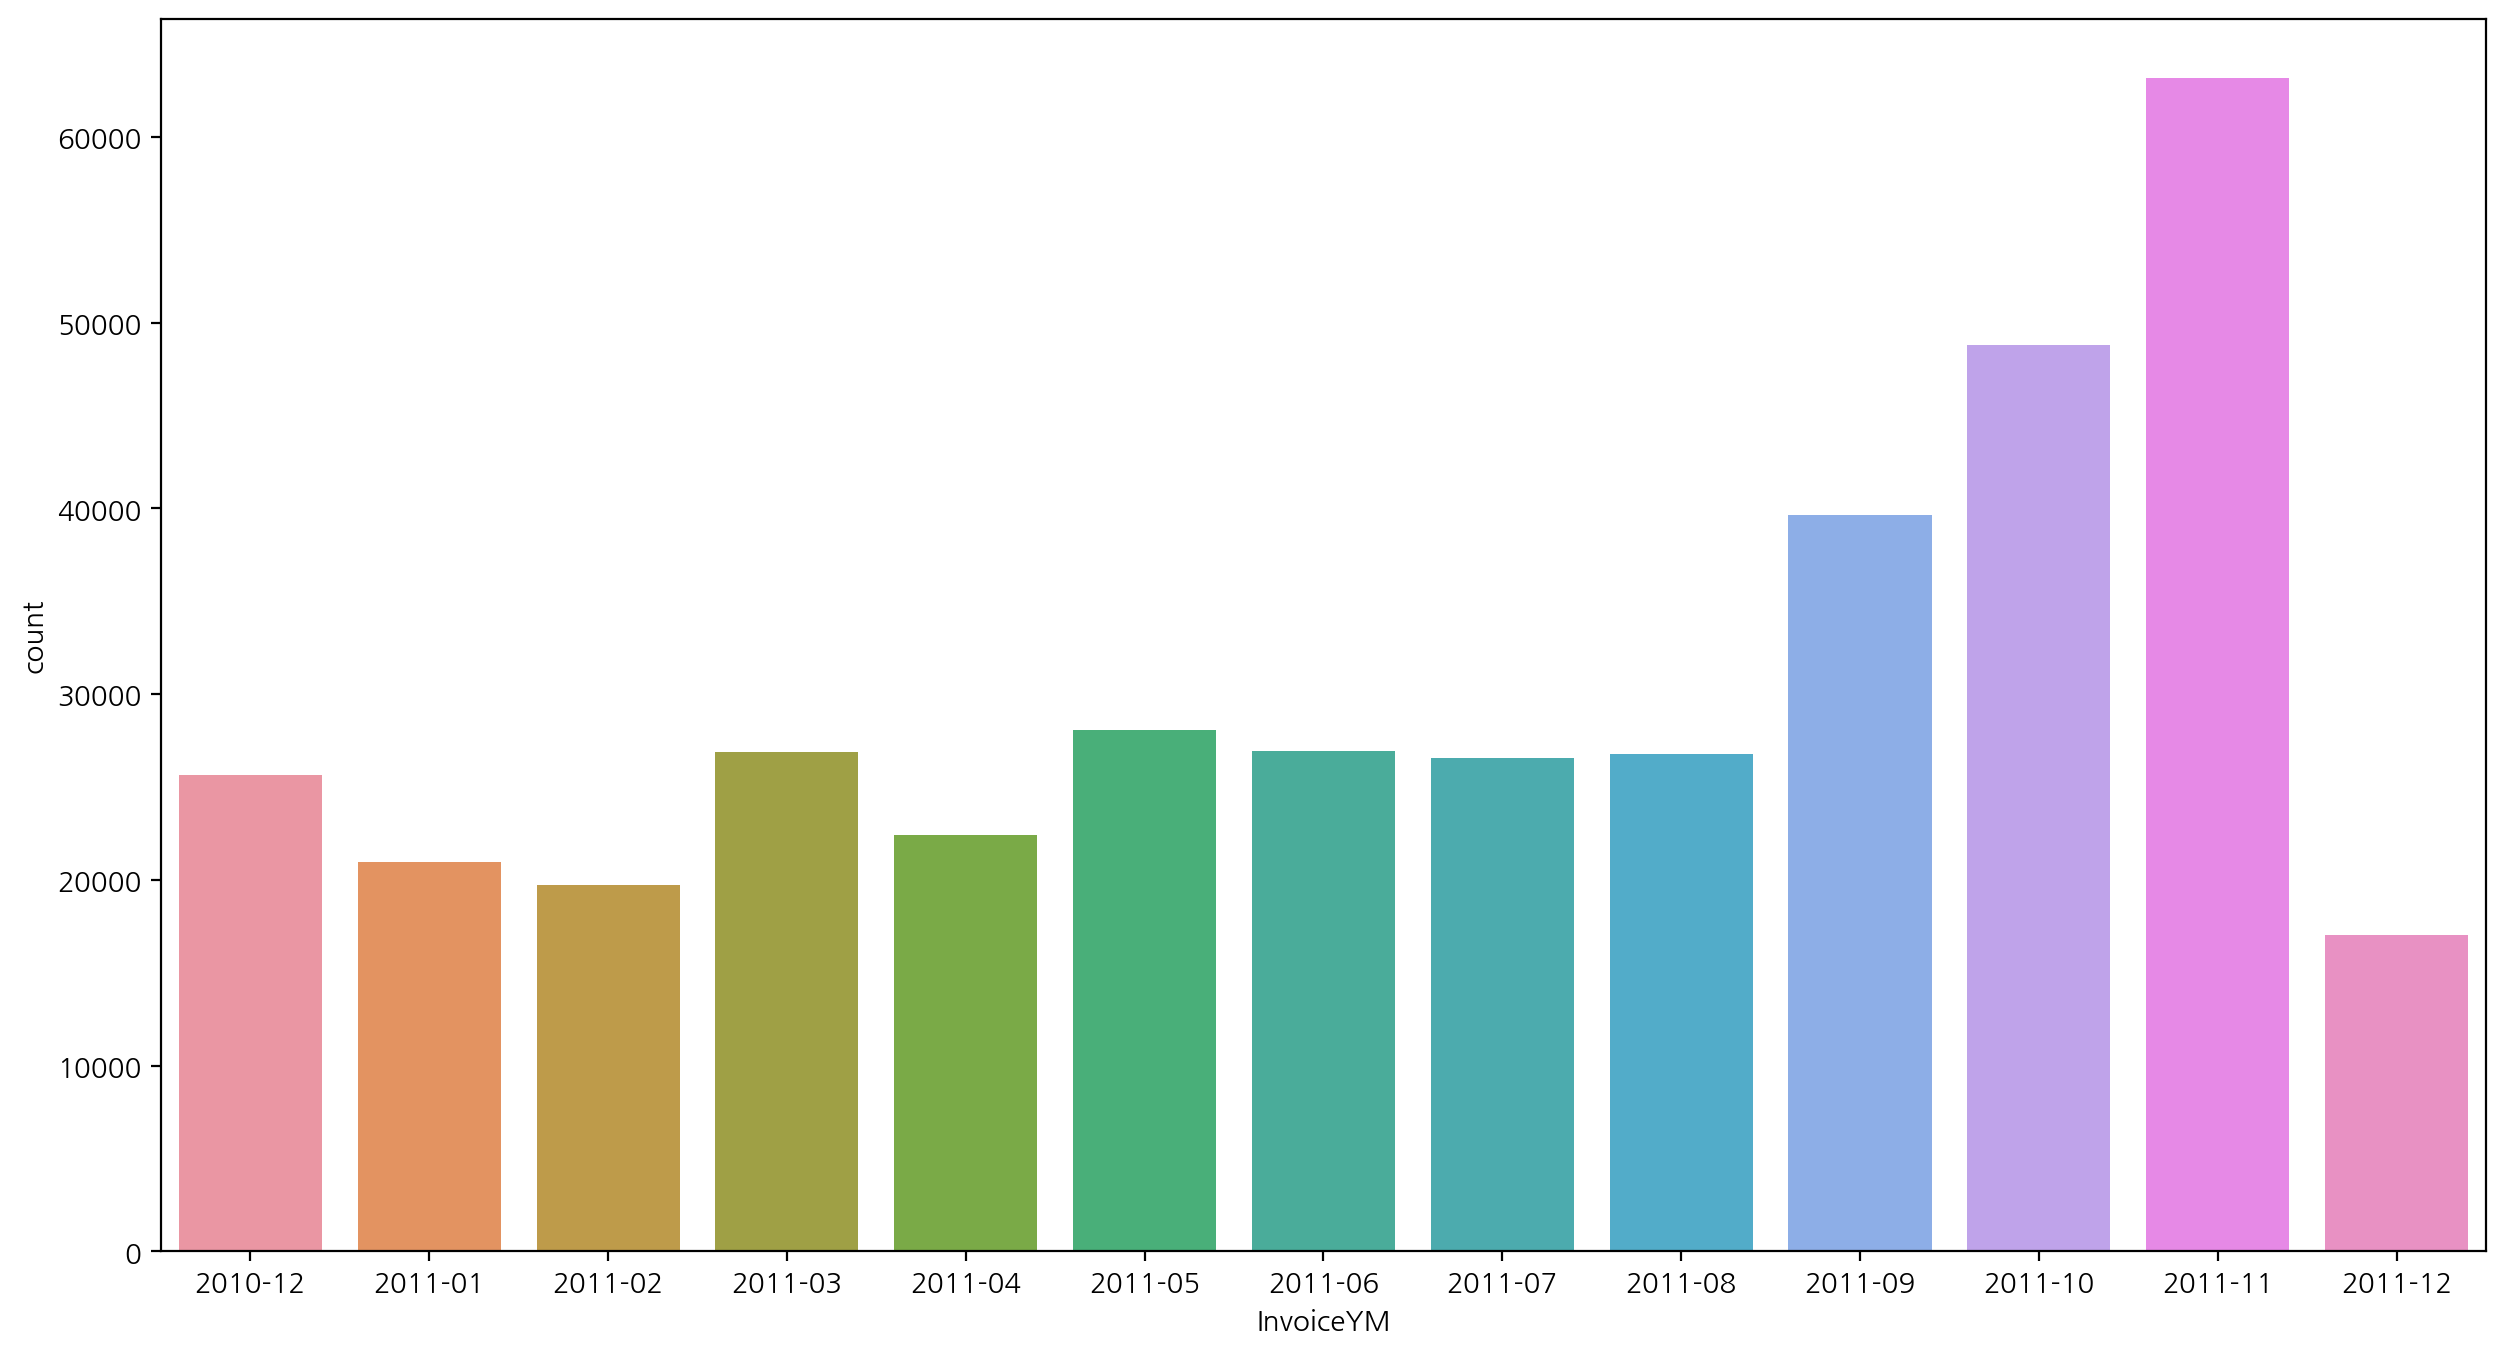

In [80]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_valid, x='InvoiceYM')

### 요일별 데이터

<Axes: xlabel='InvoiceDow', ylabel='count'>

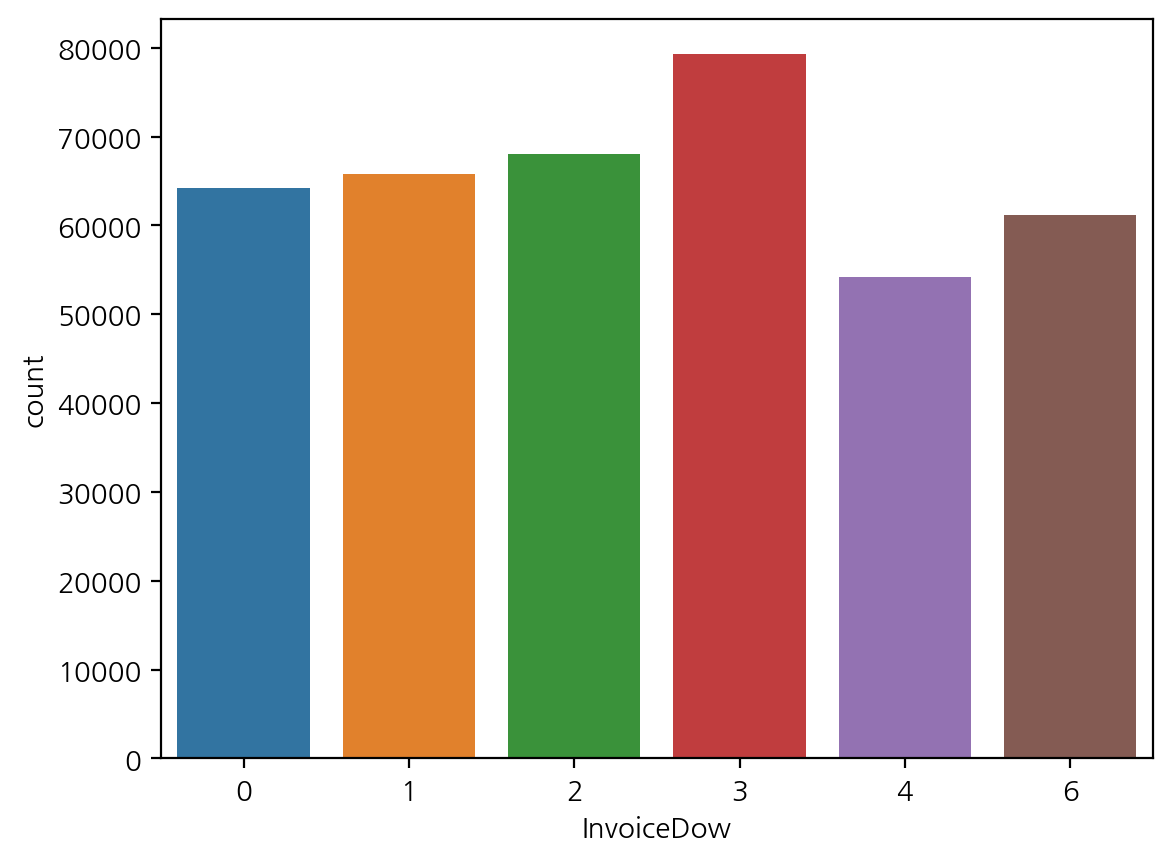

In [81]:
sns.countplot(data=df_valid, x='InvoiceDow')

In [82]:
day_name = [w for w in '월화수목금토일']
day_name.remove('토')
day_name

['월', '화', '수', '목', '금', '일']

In [83]:
dow_count = df_valid['InvoiceDow'].value_counts().sort_index()
dow_count.index = day_name
dow_count

# sort_index() 안해주면 값기준이라 내림차순으로 정렬됨. 꼭 넣어야함.

월    64231
화    65744
수    68040
목    79243
금    54222
일    61212
Name: count, dtype: int64

<Axes: >

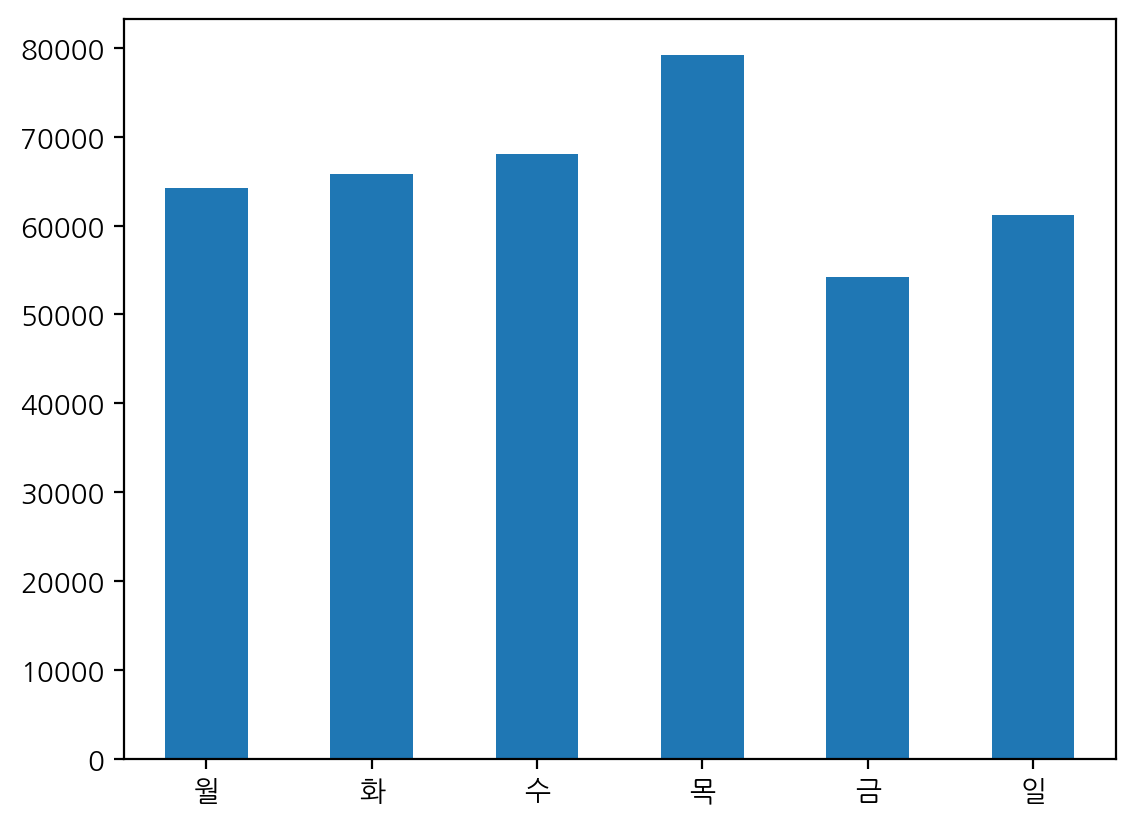

In [84]:
dow_count.plot.bar(rot=0)

# rot=0 : 글씨 눕히지 않겠따

In [85]:
df_valid['InvoiceDow'] = df_valid['InvoiceDow'].map(lambda x : '월화수목금토일'[x])

<Axes: xlabel='InvoiceDow', ylabel='count'>

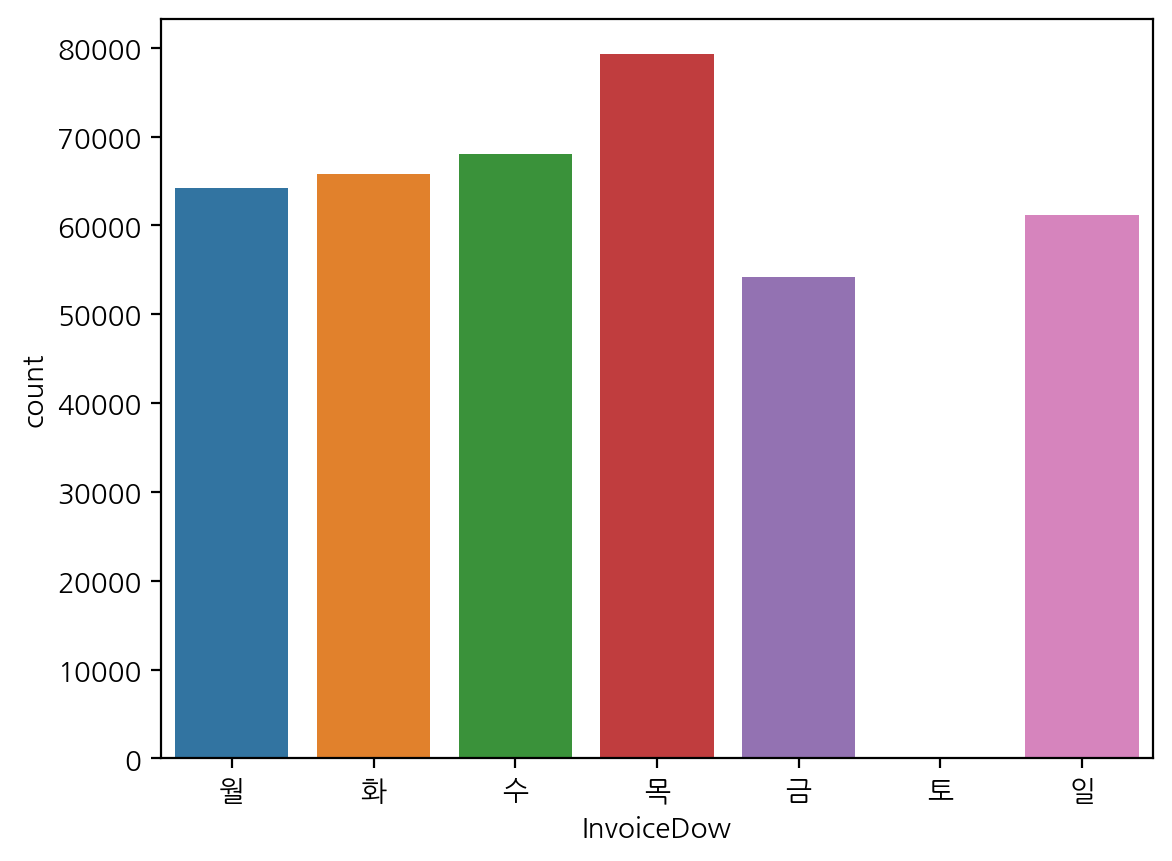

In [86]:
sns.countplot(data=df_valid, x='InvoiceDow', order=list("월화수목금토일"))

<Axes: xlabel='InvoiceHour', ylabel='count'>

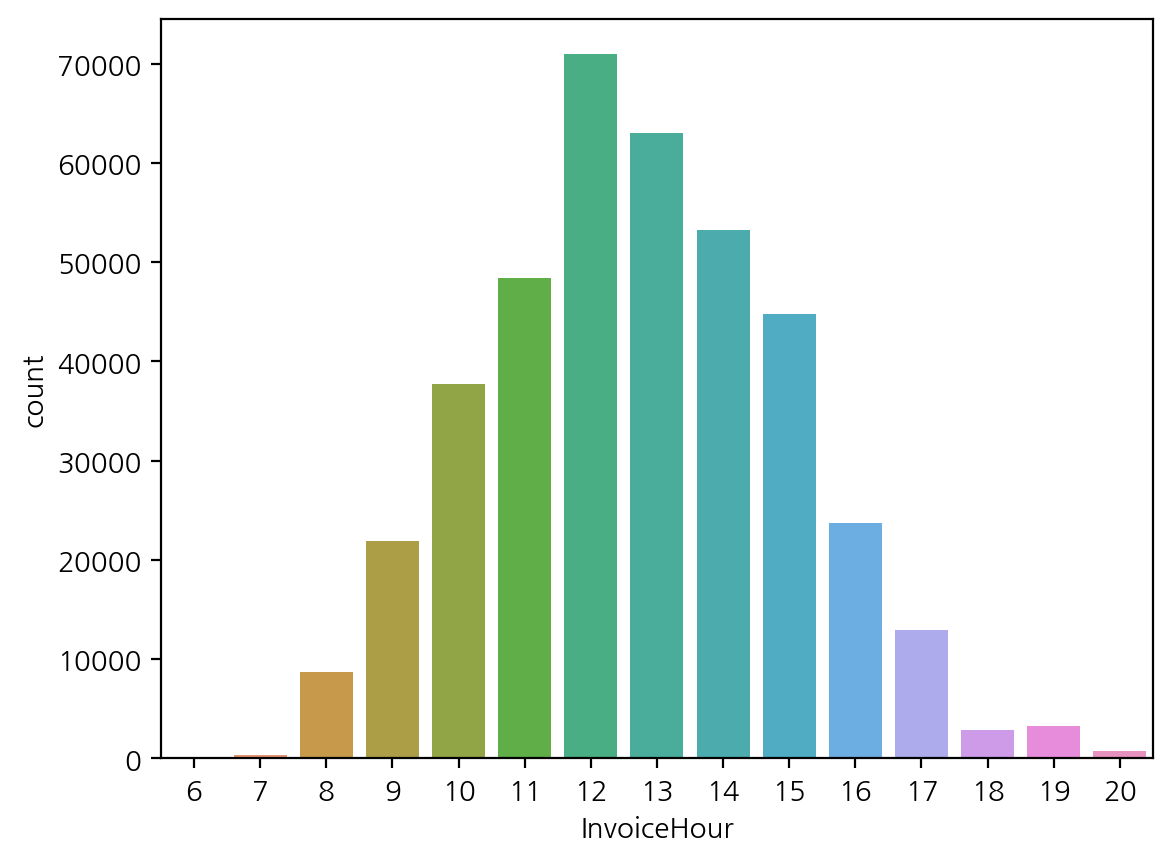

In [87]:
sns.countplot(data=df_valid, x='InvoiceHour')

<Axes: xlabel='InvoiceHour', ylabel='TotalPrice'>

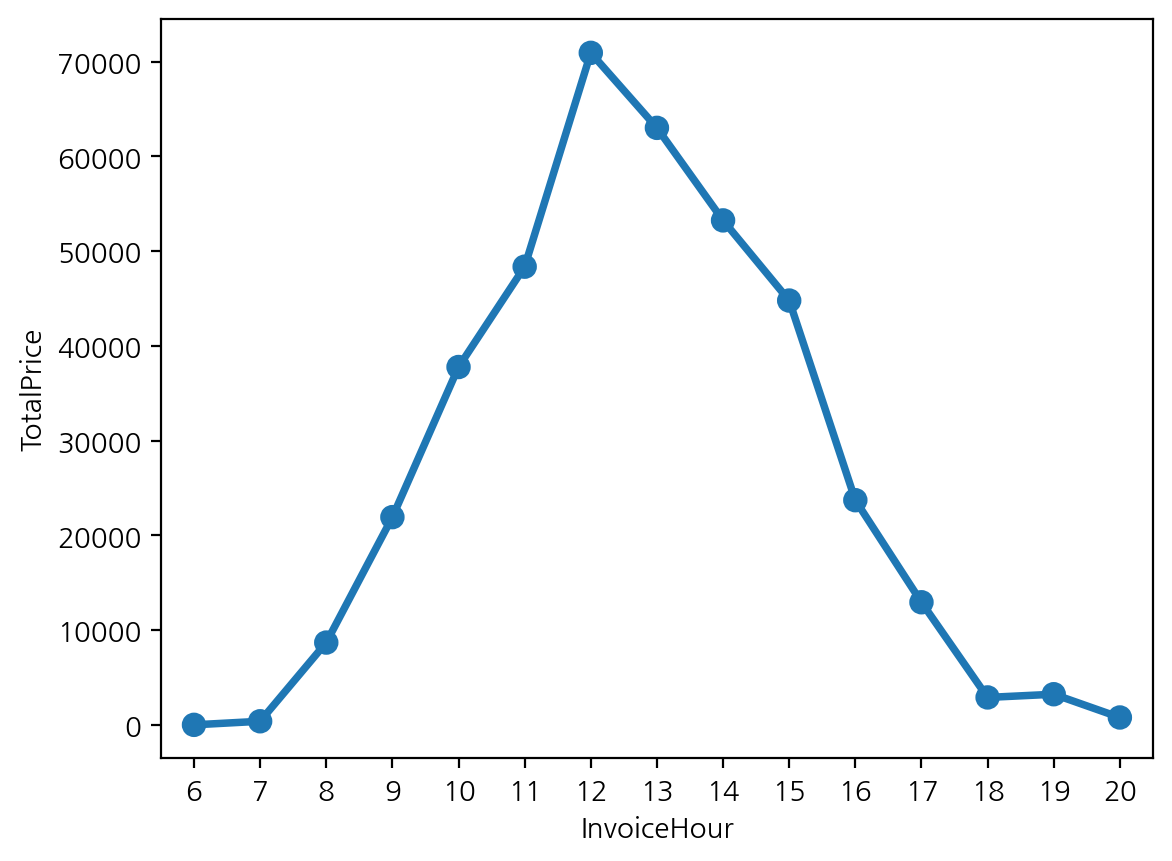

In [88]:
# 주문 건수

sns.pointplot(data=df_valid, x ='InvoiceHour', y='TotalPrice', estimator=len)

<Axes: xlabel='InvoiceHour', ylabel='TotalPrice'>

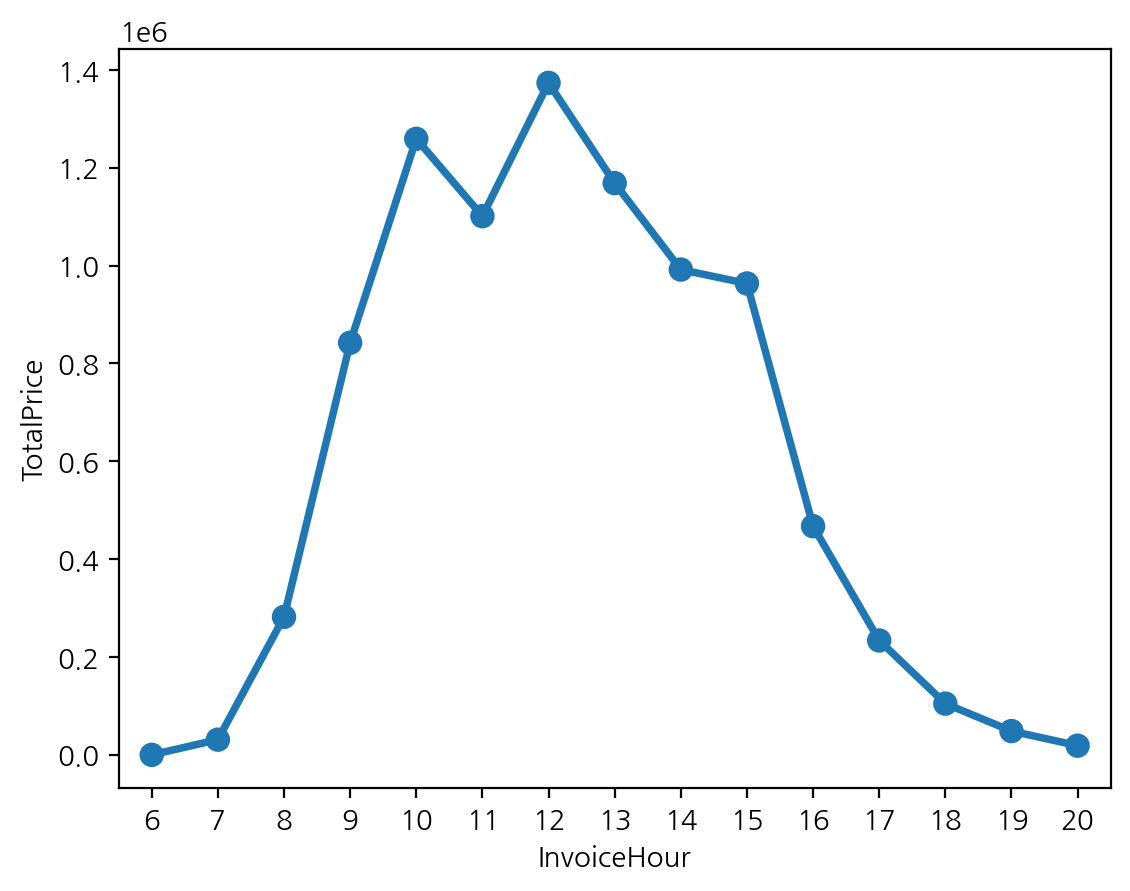

In [89]:
# 매출액

sns.pointplot(data=df_valid, x ='InvoiceHour', y='TotalPrice', estimator='sum', errorbar=None)

### 시간-요일별 빈도수

In [90]:
hour_dow = pd.crosstab(df_valid['InvoiceHour'], df_valid['InvoiceDow'])
hour_dow = hour_dow[['월','화','수','목','금','일']]
hour_dow

InvoiceDow,월,화,수,목,금,일
InvoiceHour,,,,,,
6,0,0,0,1,0,0
7,61,65,59,64,130,0
8,1563,1710,1818,1763,1833,0
9,4345,4542,4078,4569,4368,25
10,6106,6575,6927,7528,7161,3476
11,7401,8418,8292,7134,7189,9931
12,10585,11903,12684,12908,9765,13093
13,10459,10274,11137,11446,8300,11403
14,9119,9428,8716,9173,7227,9588


In [91]:
hour_dow.style.background_gradient(axis=None, cmap='OrRd').format("{:,}")

InvoiceDow,월,화,수,목,금,일
InvoiceHour,,,,,,
6,0,0,0,1,0,0
7,61,65,59,64,130,0
8,"1,563","1,710","1,818","1,763","1,833",0
9,"4,345","4,542","4,078","4,569","4,368",25
10,"6,106","6,575","6,927","7,528","7,161","3,476"
11,"7,401","8,418","8,292","7,134","7,189","9,931"
12,"10,585","11,903","12,684","12,908","9,765","13,093"
13,"10,459","10,274","11,137","11,446","8,300","11,403"
14,"9,119","9,428","8,716","9,173","7,227","9,588"


<Axes: xlabel='InvoiceDow', ylabel='InvoiceHour'>

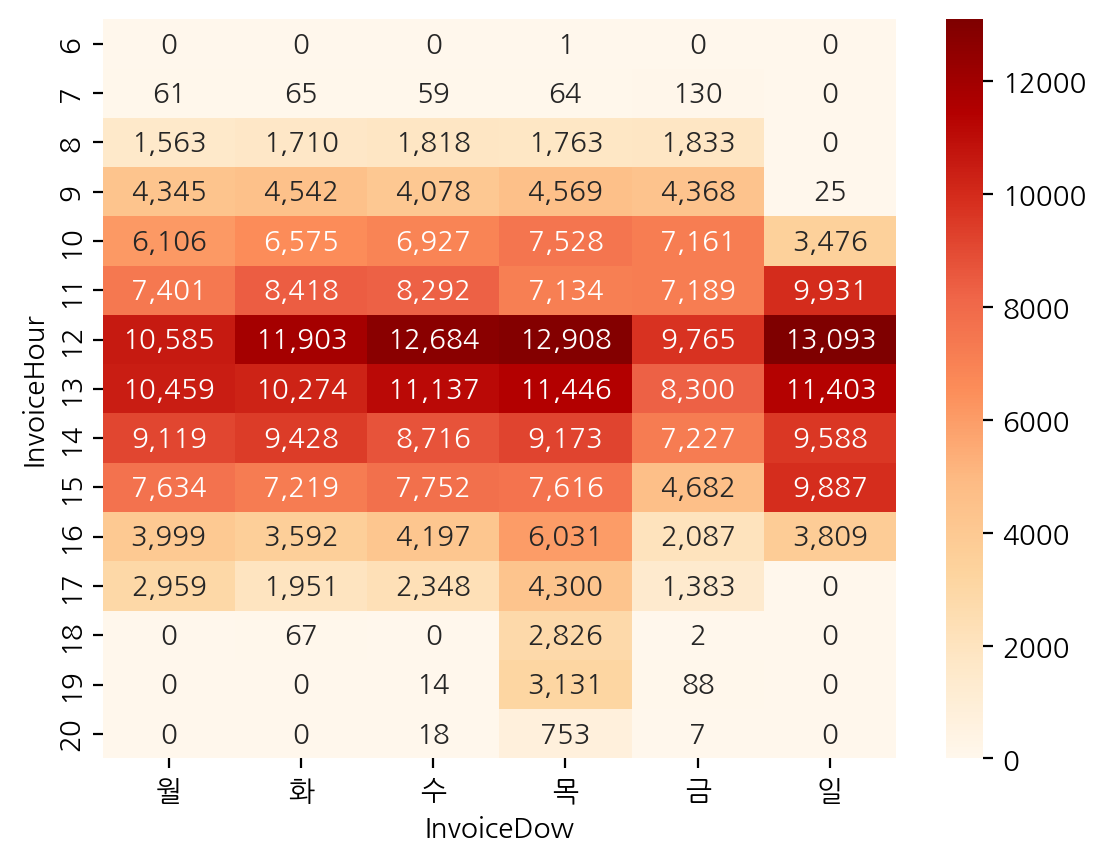

In [92]:
sns.heatmap(hour_dow, cmap='OrRd', annot=True, fmt=',.0f')

array([<Axes: xlabel='InvoiceHour'>, <Axes: xlabel='InvoiceHour'>,
       <Axes: xlabel='InvoiceHour'>, <Axes: xlabel='InvoiceHour'>,
       <Axes: xlabel='InvoiceHour'>, <Axes: xlabel='InvoiceHour'>],
      dtype=object)

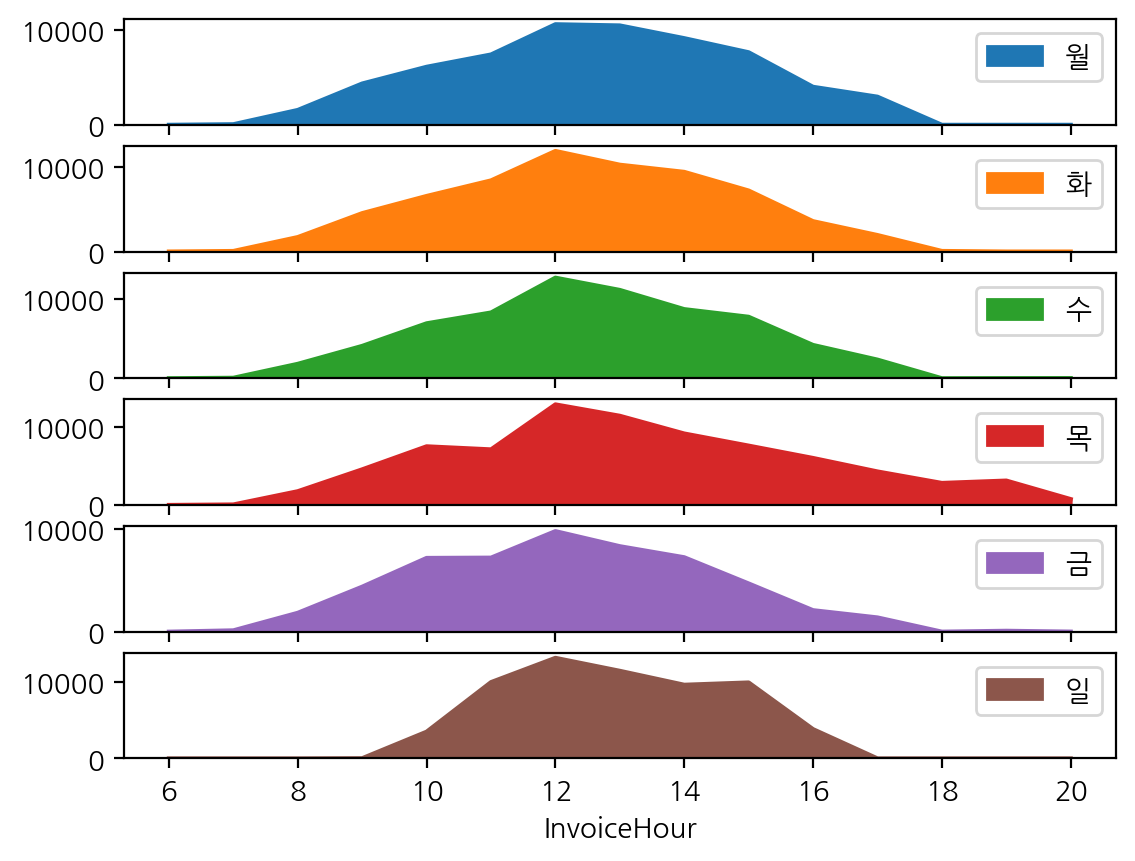

In [93]:
hour_dow.plot(subplots=True, kind='area')

## 고객 관점
- ARPU(Average Revenue Per User):
    - 가입한 서비스에 대해 가입자 1명이 특정 기간 동안 지출한 평균 금액
    - ARPU = 매출 / 중복을 제외한 순수 활동 사용자 수
- ARPPU(Average Revenue Per Paying User):
    - 지불 유저 1명 당 한달에 결제하는 평균 금액을 산정한 수치
 

In [94]:
arppu = df_valid.groupby(['InvoiceYM']).agg({"TotalPrice":'sum', 'CustomerID':'nunique'})
arppu

,TotalPrice,CustomerID
InvoiceYM,,
2010-12,570422.730,885
2011-01,568101.310,741
2011-02,446084.920,758
2011-03,594081.760,974
2011-04,468374.331,856
2011-05,677355.150,1056
2011-06,660046.050,991
2011-07,598962.901,949
2011-08,644051.040,935


In [95]:
arppu['ARPPU'] = arppu["TotalPrice"] / arppu['CustomerID']
arppu

,TotalPrice,CustomerID,ARPPU
InvoiceYM,,,
2010-12,570422.730,885,644.545458
2011-01,568101.310,741,766.668435
2011-02,446084.920,758,588.502533
2011-03,594081.760,974,609.940205
2011-04,468374.331,856,547.166275
2011-05,677355.150,1056,641.434801
2011-06,660046.050,991,666.040414
2011-07,598962.901,949,631.151634
2011-08,644051.040,935,688.824642


<Axes: title={'center': '매출액'}, xlabel='InvoiceYM'>

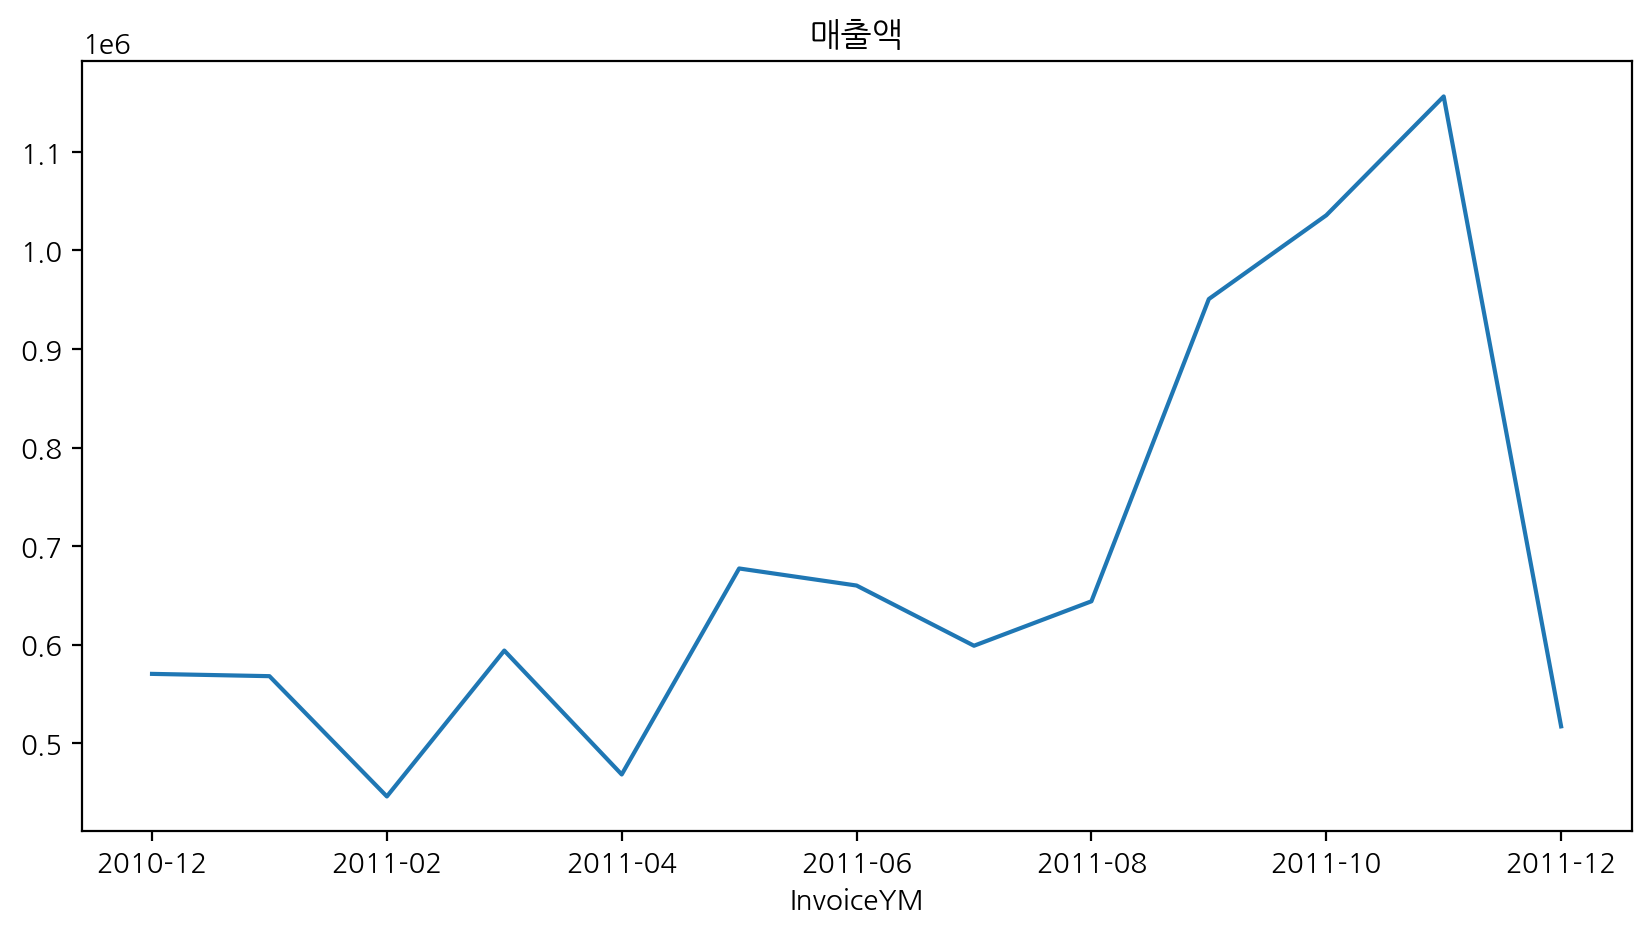

In [96]:
arppu['TotalPrice'].plot(figsize=(10,5),title='매출액')

<Axes: title={'center': '월별 고객 수'}, xlabel='InvoiceYM'>

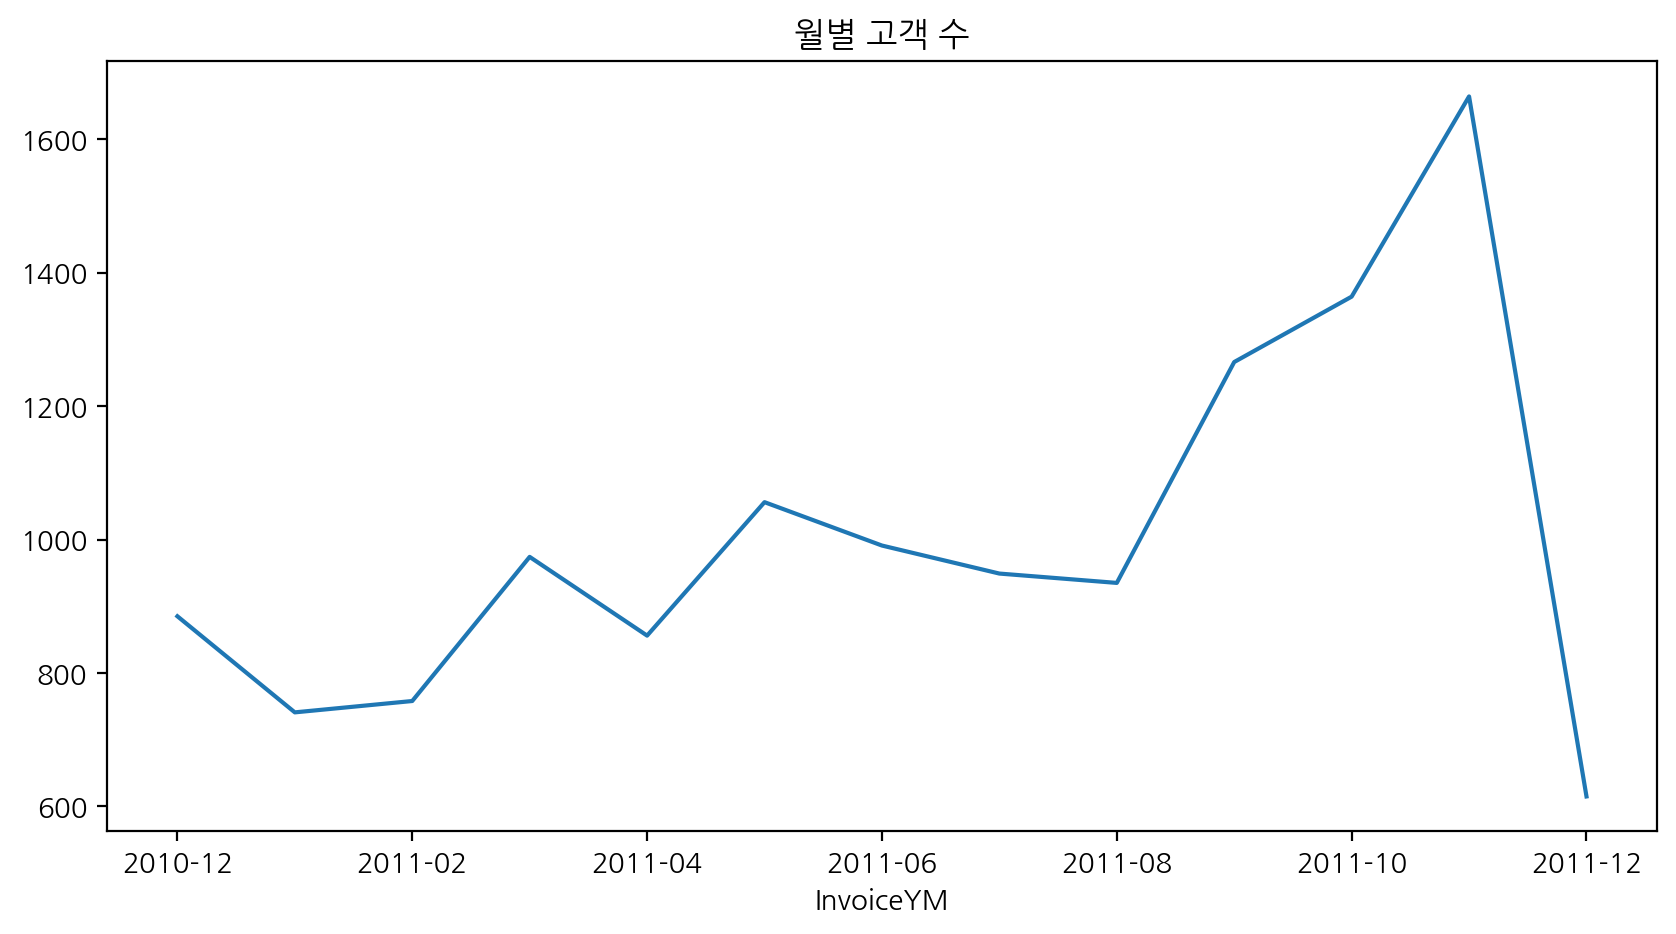

In [97]:
arppu['CustomerID'].plot(figsize=(10,5),title='월별 고객 수')

<Axes: title={'center': 'ARPPU'}, xlabel='InvoiceYM'>

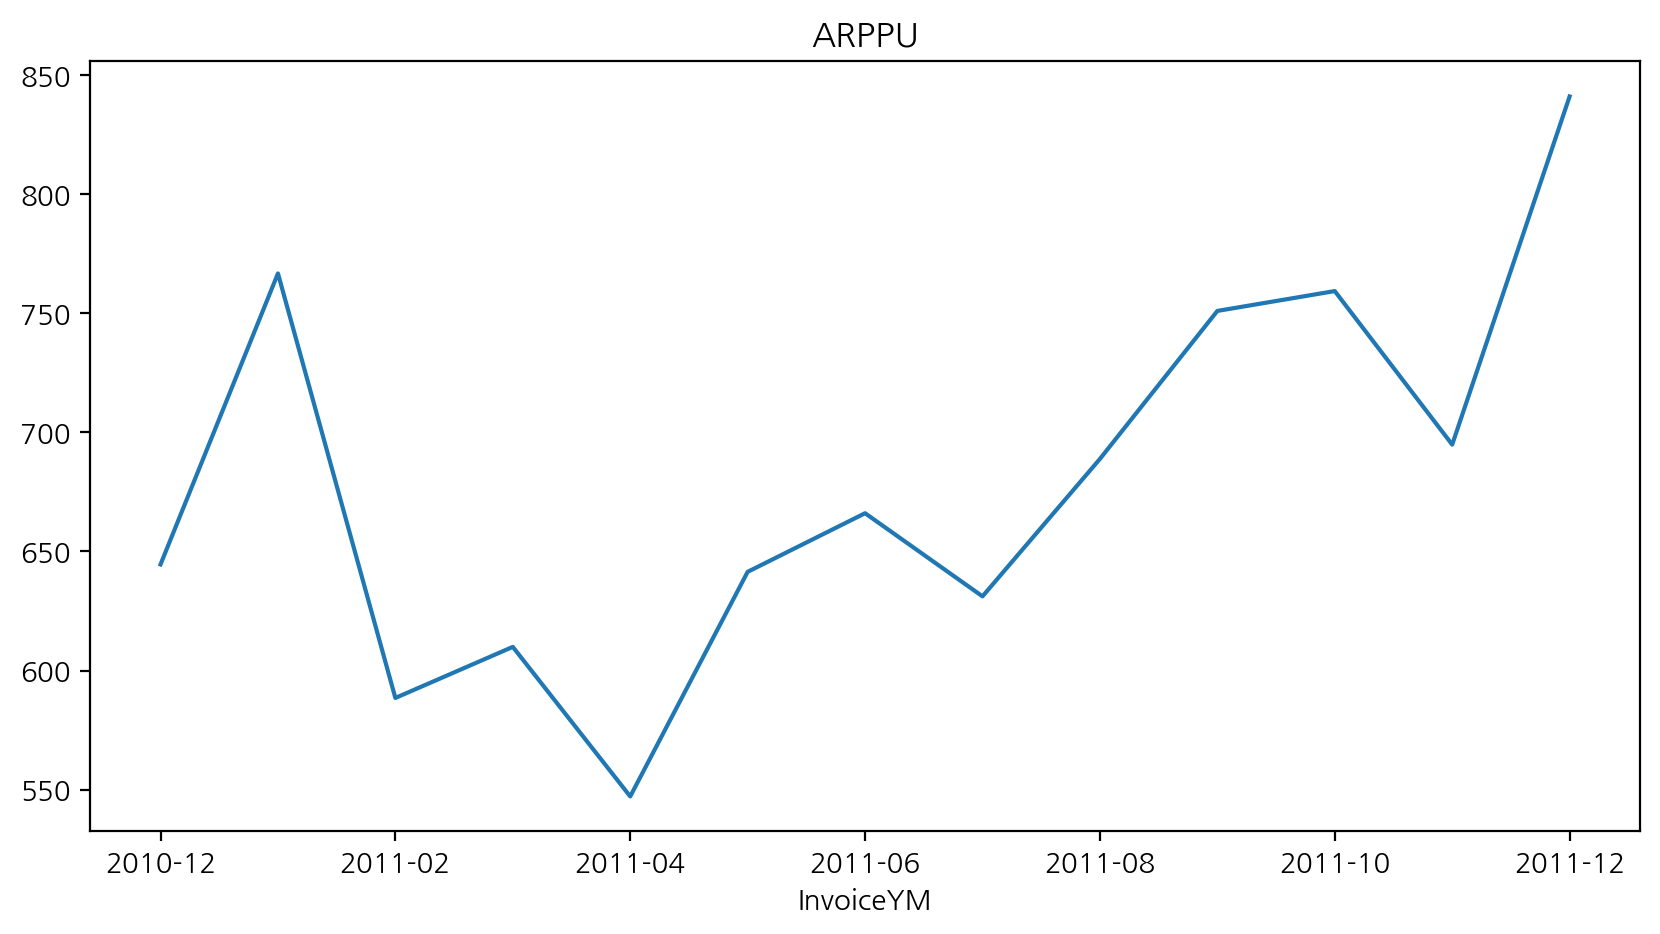

In [98]:
arppu['ARPPU'].plot(figsize=(10,5),title='ARPPU')

In [99]:
cust_agg = df_valid.groupby("CustomerID").agg({'InvoiceNo':'count', 'TotalPrice':['mean','sum']})
cust_agg

InvoiceNo    TotalPrice          
               count          mean       sum
CustomerID                                  
12346.0            1  77183.600000  77183.60
12347.0          182     23.681319   4310.00
12348.0           31     57.975484   1797.24
12349.0           73     24.076027   1757.55
12350.0           17     19.670588    334.40
...              ...           ...       ...
18280.0           10     18.060000    180.60
18281.0            7     11.545714     80.82
18282.0           12     14.837500    178.05
18283.0          721      2.837074   2045.53
18287.0           70     26.246857   1837.28

[4338 rows x 3 columns]

### MAU(Monthly Active User)

<Axes: xlabel='InvoiceYM'>

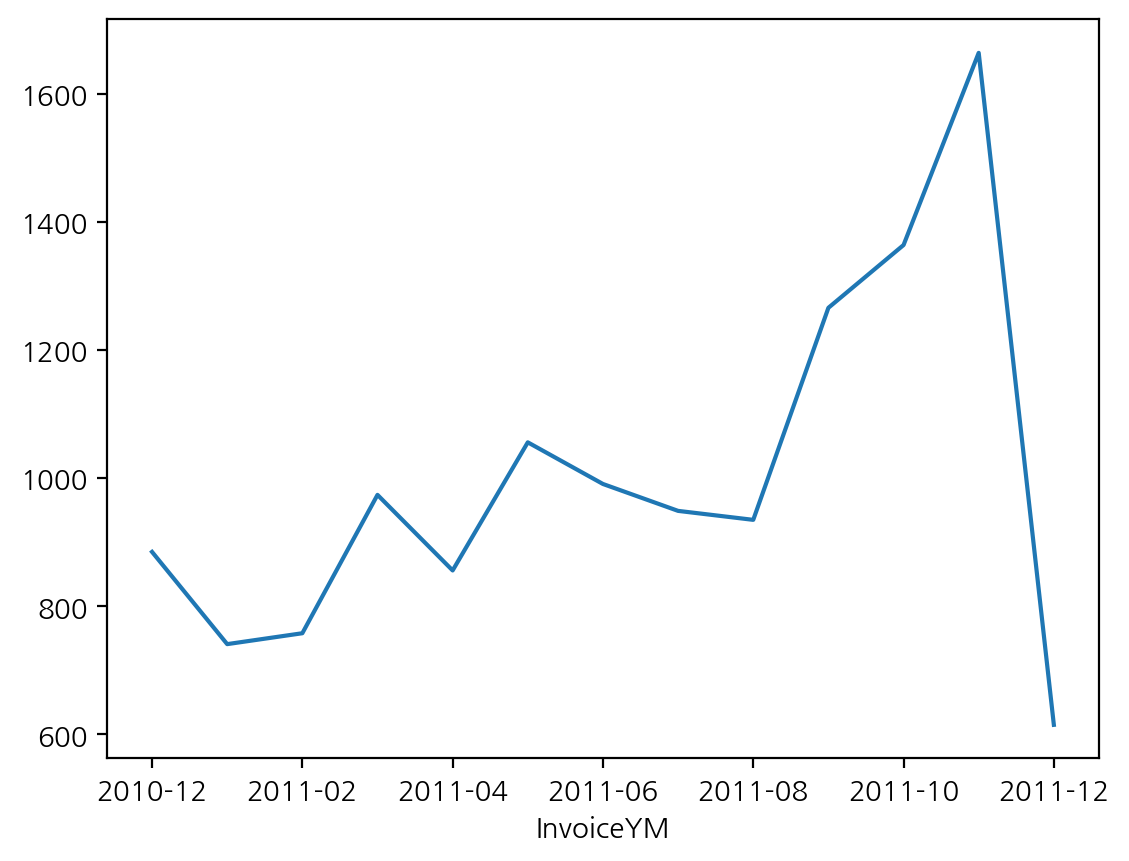

In [100]:
MAU = df_valid.groupby('InvoiceYM')['CustomerID'].nunique()
MAU.plot()

# 구매 mau
# 로그인 mau

### 월별, 주문건, 중복을 제외한 주문제품 종류 수, 고객 수, 총 주문금액

In [101]:
df_valid.groupby("InvoiceYM").agg({'InvoiceNo':'count', 
                                   'StockCode':'nunique', 
                                   'CustomerID':'nunique',
                                   'UnitPrice':'mean',
                                   'Quantity':'sum',
                                   'TotalPrice':'sum'})

,InvoiceNo,StockCode,CustomerID,UnitPrice,Quantity,TotalPrice
InvoiceYM,,,,,,
2010-12,25670,2411,885,3.142953,311048,570422.730
2011-01,20988,2121,741,3.155834,348473,568101.310
2011-02,19706,2124,758,3.177686,265027,446084.920
2011-03,26870,2234,974,3.269996,347582,594081.760
2011-04,22433,2217,856,3.501247,291366,468374.331
2011-05,28073,2219,1056,3.615606,372864,677355.150
2011-06,26926,2339,991,3.142043,363014,660046.050
2011-07,26580,2351,949,2.838771,367360,598962.901
2011-08,26790,2356,935,2.944274,397373,644051.040


### 월단위 데이터 (리텐션)
- 코호트 : 특정 시점, 행위 묶는 거

In [102]:
df_valid

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceYM,InvoiceTime,InvoiceHour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,True,,False,2010,12,1,수,2010-12,08:26:00,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False,2010,12,1,수,2010-12,08:26:00,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,True,,False,2010,12,1,수,2010-12,08:26:00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False,2010,12,1,수,2010-12,08:26:00,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False,2010,12,1,수,2010-12,08:26:00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,True,,False,2011,12,9,금,2011-12,12:50:00,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,True,,False,2011,12,9,금,2011-12,12:50:00,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,True,,False,2011,12,9,금,2011-12,12:50:00,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,True,,False,2011,12,9,금,2011-12,12:50:00,12


In [103]:
df_valid['InvoiceDateFirst'] = df_valid.groupby(['CustomerID'])['InvoiceDate'].transform("min")

### 첫 구매일로 부터 몇 달째 구매인가?

In [104]:
year_diff = df_valid['InvoiceDate'].dt.year - df_valid['InvoiceDateFirst'].dt.year
month_diff = df_valid['InvoiceDate'].dt.month - df_valid['InvoiceDateFirst'].dt.month

In [105]:
month_diff.value_counts()

 0     124030
-1      21677
 2      18038
 1      17405
 3      15872
 4      15537
 5      14727
-3      14098
-2      13399
 6      12393
 7      11986
-7      11946
 8      11435
-4      11316
-5      11312
-9      11121
-6      11069
-11     10111
-8       9628
 9       8870
-10      8689
 10      6699
 11      1334
Name: count, dtype: int64

In [106]:
year_diff.value_counts()

0    251153
1    141539
Name: count, dtype: int64

In [107]:
df_valid['CohortIndex'] = (year_diff * 12) + month_diff + 1

In [108]:
df_valid['CohortIndex'].value_counts()

CohortIndex
1     116857
2      27516
4      26993
3      26727
6      26673
5      25165
7      23462
8      23298
12     23011
10     22968
9      22751
11     20098
13      7173
Name: count, dtype: int64

<Axes: xlabel='CohortIndex', ylabel='count'>

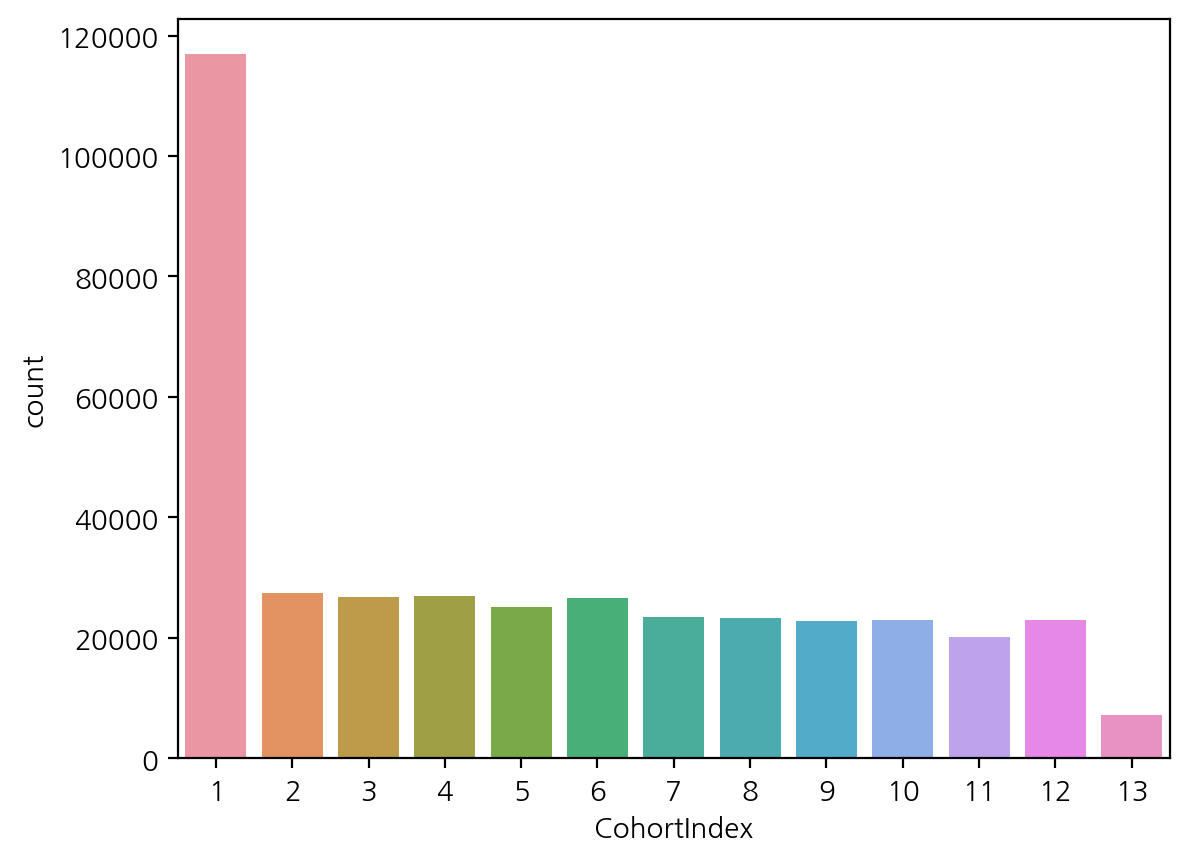

In [109]:
sns.countplot(data=df_valid, x = 'CohortIndex')

### 2010년 일별 리텐션

In [110]:
df_valid_30 = df_valid[df_valid['InvoiceYear'] == 2010]

In [111]:
days_in_month = {
    1: 31,
    2: 28,  # 평년 기준
    3: 31,
    4: 30,
    5: 31,
    6: 30,
    7: 31,
    8: 31,
    9: 30,
    10: 31,
    11: 30,
    12: 31
}



# 각 거래의 월 차이 계산 (월별 일수를 고려하기 위해)
month_diff = (df_valid_30['InvoiceDate'].dt.month - df_valid_30['InvoiceDateFirst'].dt.month)

# 각 거래의 일 차이 계산
day_diff = (df_valid_30['InvoiceDate'] - df_valid_30['InvoiceDateFirst']).dt.days


# 월별 일수를 담은 리스트
days_in_month = df_valid_30['InvoiceDateFirst'].dt.daysinmonth.tolist()

# 월별 일수 계산
month_days = [days_in_month[i-1] for i in df_valid_30['InvoiceDateFirst'].dt.month]  # 각 월의 시작 날부터 그 달의 일수를 가져옵니다.

# 일별 리텐션 계산
df_valid_30['CohortIndexDay'] = month_diff * month_days + day_diff + 1

df_valid_30['CohortIndexDay'].value_counts()


C:\Users\hmins\AppData\Local\Temp\ipykernel_18532\610524872.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid_30['CohortIndexDay'] = month_diff * month_days + day_diff + 1


CohortIndexDay
1     19267
8       759
9       622
7       559
5       532
2       495
14      448
13      443
6       439
15      314
4       278
12      258
10      224
11      185
16      179
3       154
18      120
19      113
17      102
20       56
22       51
21       36
23       36
Name: count, dtype: int64

<Axes: xlabel='CohortIndexDay', ylabel='count'>

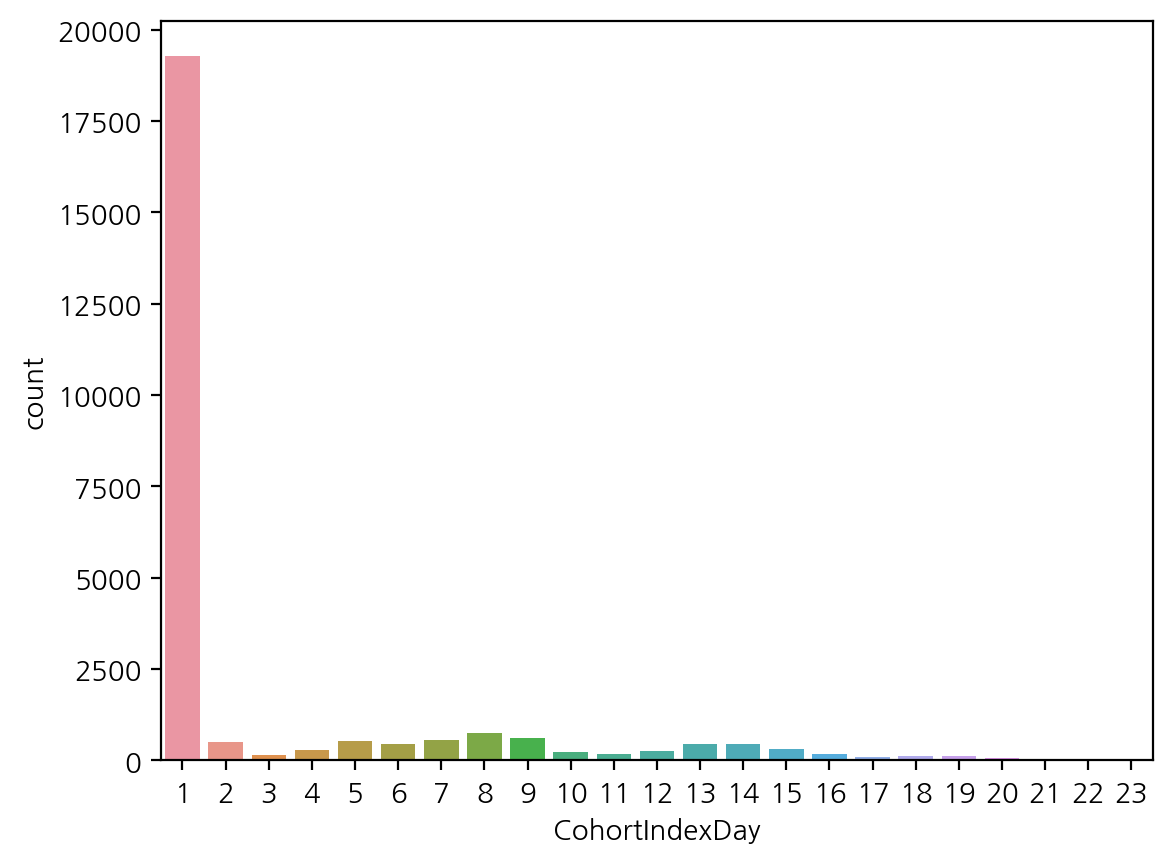

In [112]:
sns.countplot(data=df_valid_30, x = 'CohortIndexDay')

### 잔존 빈도
- 중복 제외하고 몇명의 고객이 왔는가
- InvoiceDateFirstYM 첫 구매달 이후에 한달 지날 수록 고객 빈도

In [113]:
df_valid['InvoiceDateFirstYM'] = df_valid['InvoiceDateFirst'].astype(str).str[:7]

In [114]:
cohort_count = df_valid.groupby(['InvoiceDateFirstYM', 'CohortIndex'])['CustomerID'].nunique().unstack()
cohort_count
# CohortIndex=1인 열은 달마다 처음 주문을 한 고객의 빈도수도 볼 수 있음(신규유치고객)
# 매월 신규 고객 주문 수

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
InvoiceDateFirstYM,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='CohortIndex', ylabel='InvoiceDateFirstYM'>

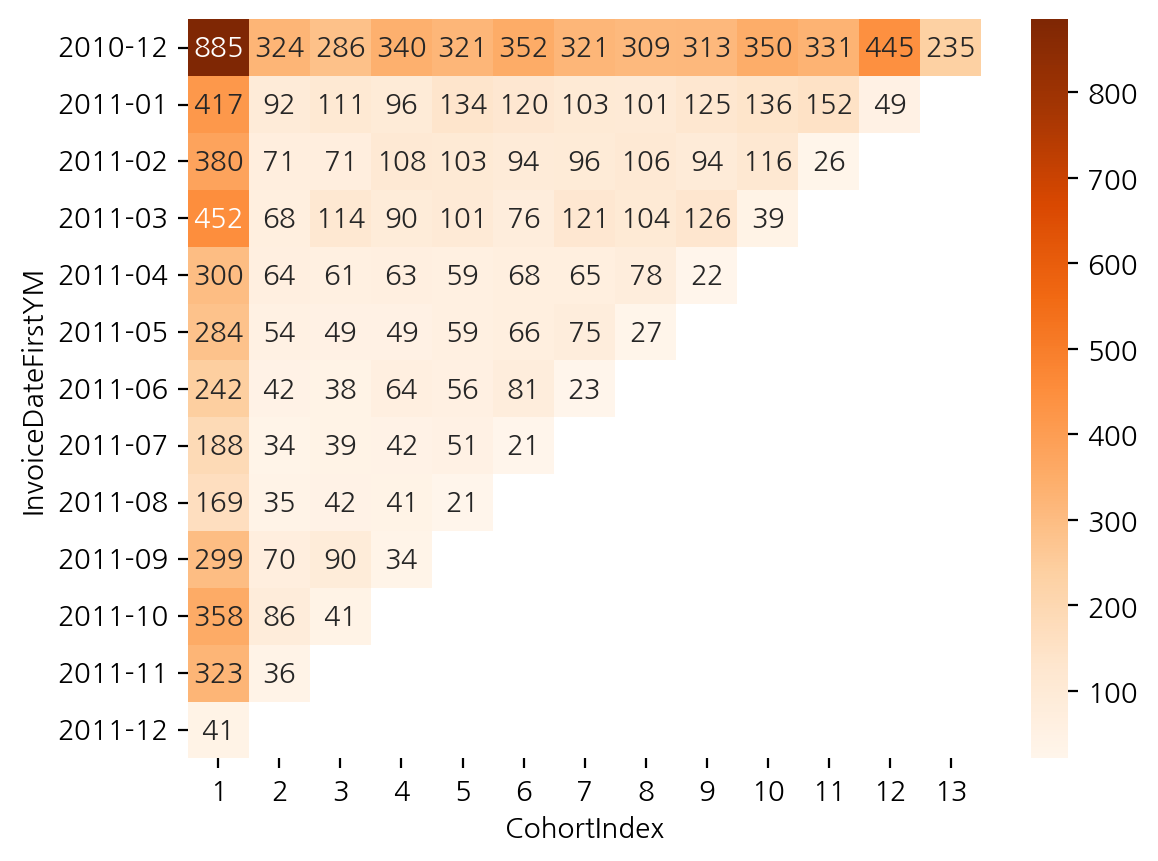

In [115]:
sns.heatmap(cohort_count, cmap='Oranges', annot=True, fmt=".0f")

### 월별 신규 유입 고객 수
- Acqusition

<Axes: xlabel='InvoiceDateFirstYM'>

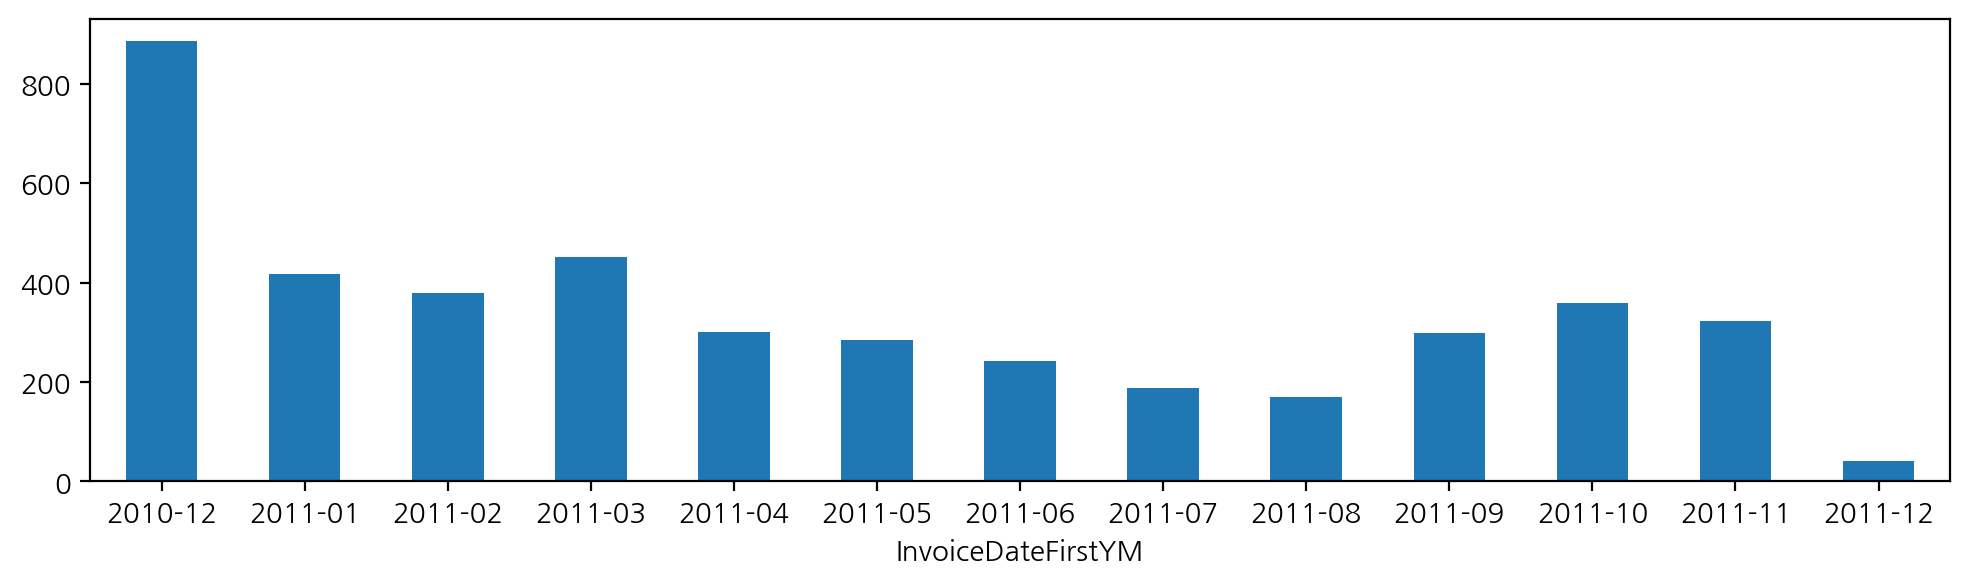

In [116]:
cohort_count[1].plot(kind='bar',figsize=(12,3), rot=0)

### 잔존율 구하기

In [117]:
cohort_norm = cohort_count.div(cohort_count[1], axis=0)
cohort_norm

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
InvoiceDateFirstYM,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='CohortIndex', ylabel='InvoiceDateFirstYM'>

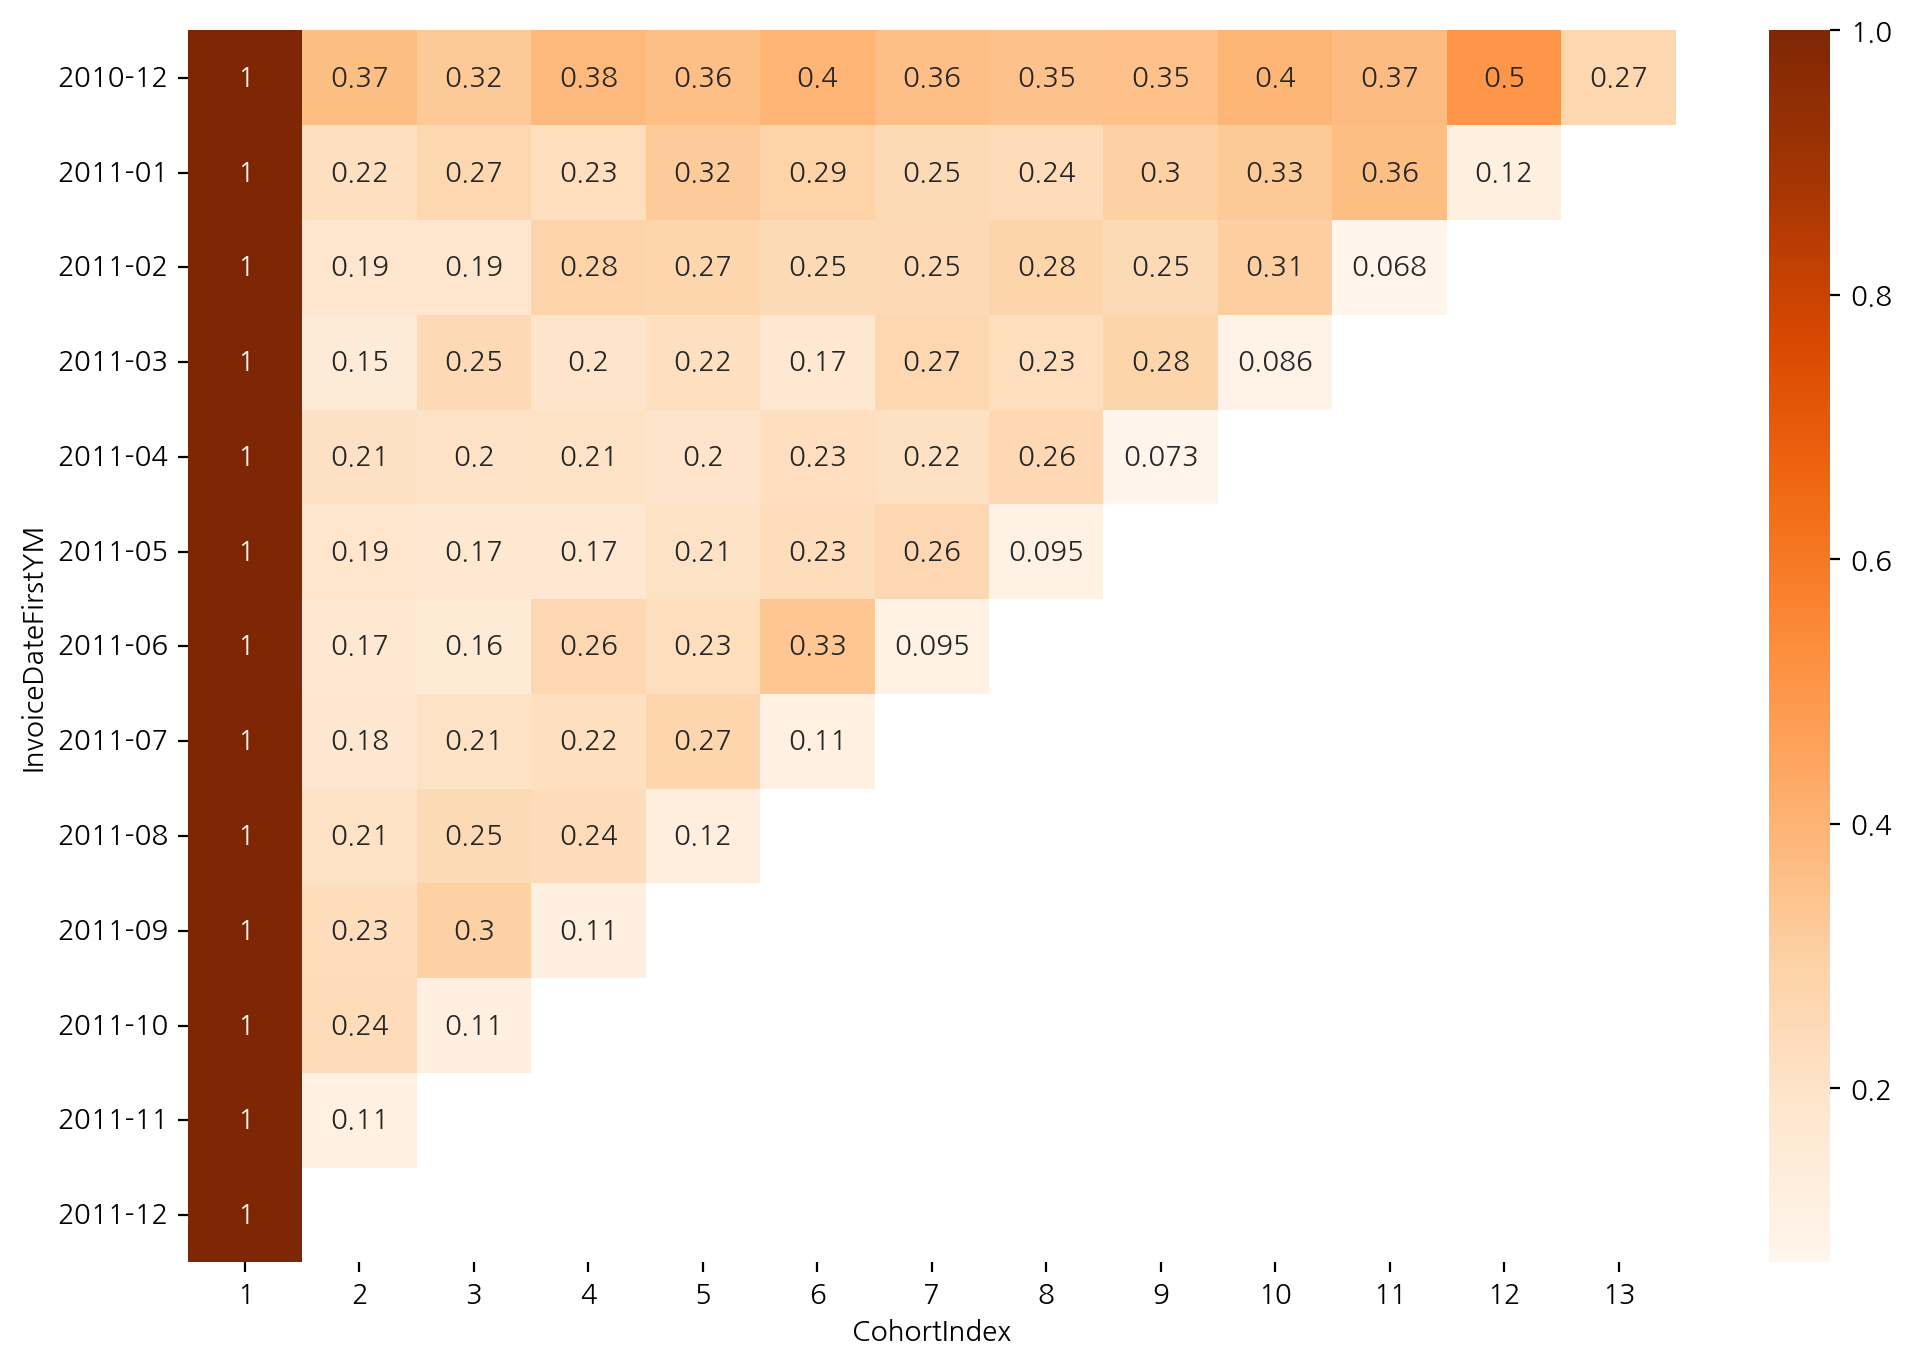

In [118]:
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_norm, cmap='Oranges', annot=True)

### 월별 매출 리텐션

In [119]:
df_valid.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,...,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceYM,InvoiceTime,InvoiceHour,InvoiceDateFirst,CohortIndex,InvoiceDateFirstYM
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,True,...,2010,12,1,수,2010-12,08:26:00,8,2010-12-01 08:26:00,1,2010-12


In [120]:
cohort_total_price = df_valid.groupby(['InvoiceDateFirstYM', 'CohortIndex'])['TotalPrice'].sum().unstack()
cohort_total_price

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
InvoiceDateFirstYM,,,,,,,,,,,,,
2010-12,570422.730,275734.47,233390.47,302367.44,204034.38,336113.69,313668.16,310304.03,331001.070,471792.13,455478.90,512341.08,185360.97
2011-01,292366.840,54993.86,63157.01,71526.09,80989.77,84464.57,70073.35,72503.42,71870.481,111370.70,123252.86,26388.03,NaN
2011-02,157700.590,28937.64,40964.47,48155.39,40089.17,34155.67,49673.71,62292.80,55241.340,64688.86,10600.22,NaN,NaN
2011-03,199619.670,30040.34,58958.41,42739.08,51392.44,39962.33,64824.15,70523.62,70847.620,12761.10,NaN,NaN,NaN
2011-04,121809.051,29398.59,25028.57,24282.79,26253.16,30103.24,28505.90,34009.61,6332.000,NaN,NaN,NaN,NaN
2011-05,123739.300,18641.70,20155.73,19162.17,27752.62,32875.34,33168.34,179184.23,NaN,NaN,NaN,NaN,NaN
2011-06,135414.800,14738.49,14104.37,30898.56,26669.90,42531.09,8143.22,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,73860.401,11789.67,15488.37,17391.93,19156.82,6040.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,79601.140,20933.76,35458.48,44487.65,15284.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='CohortIndex', ylabel='InvoiceDateFirstYM'>

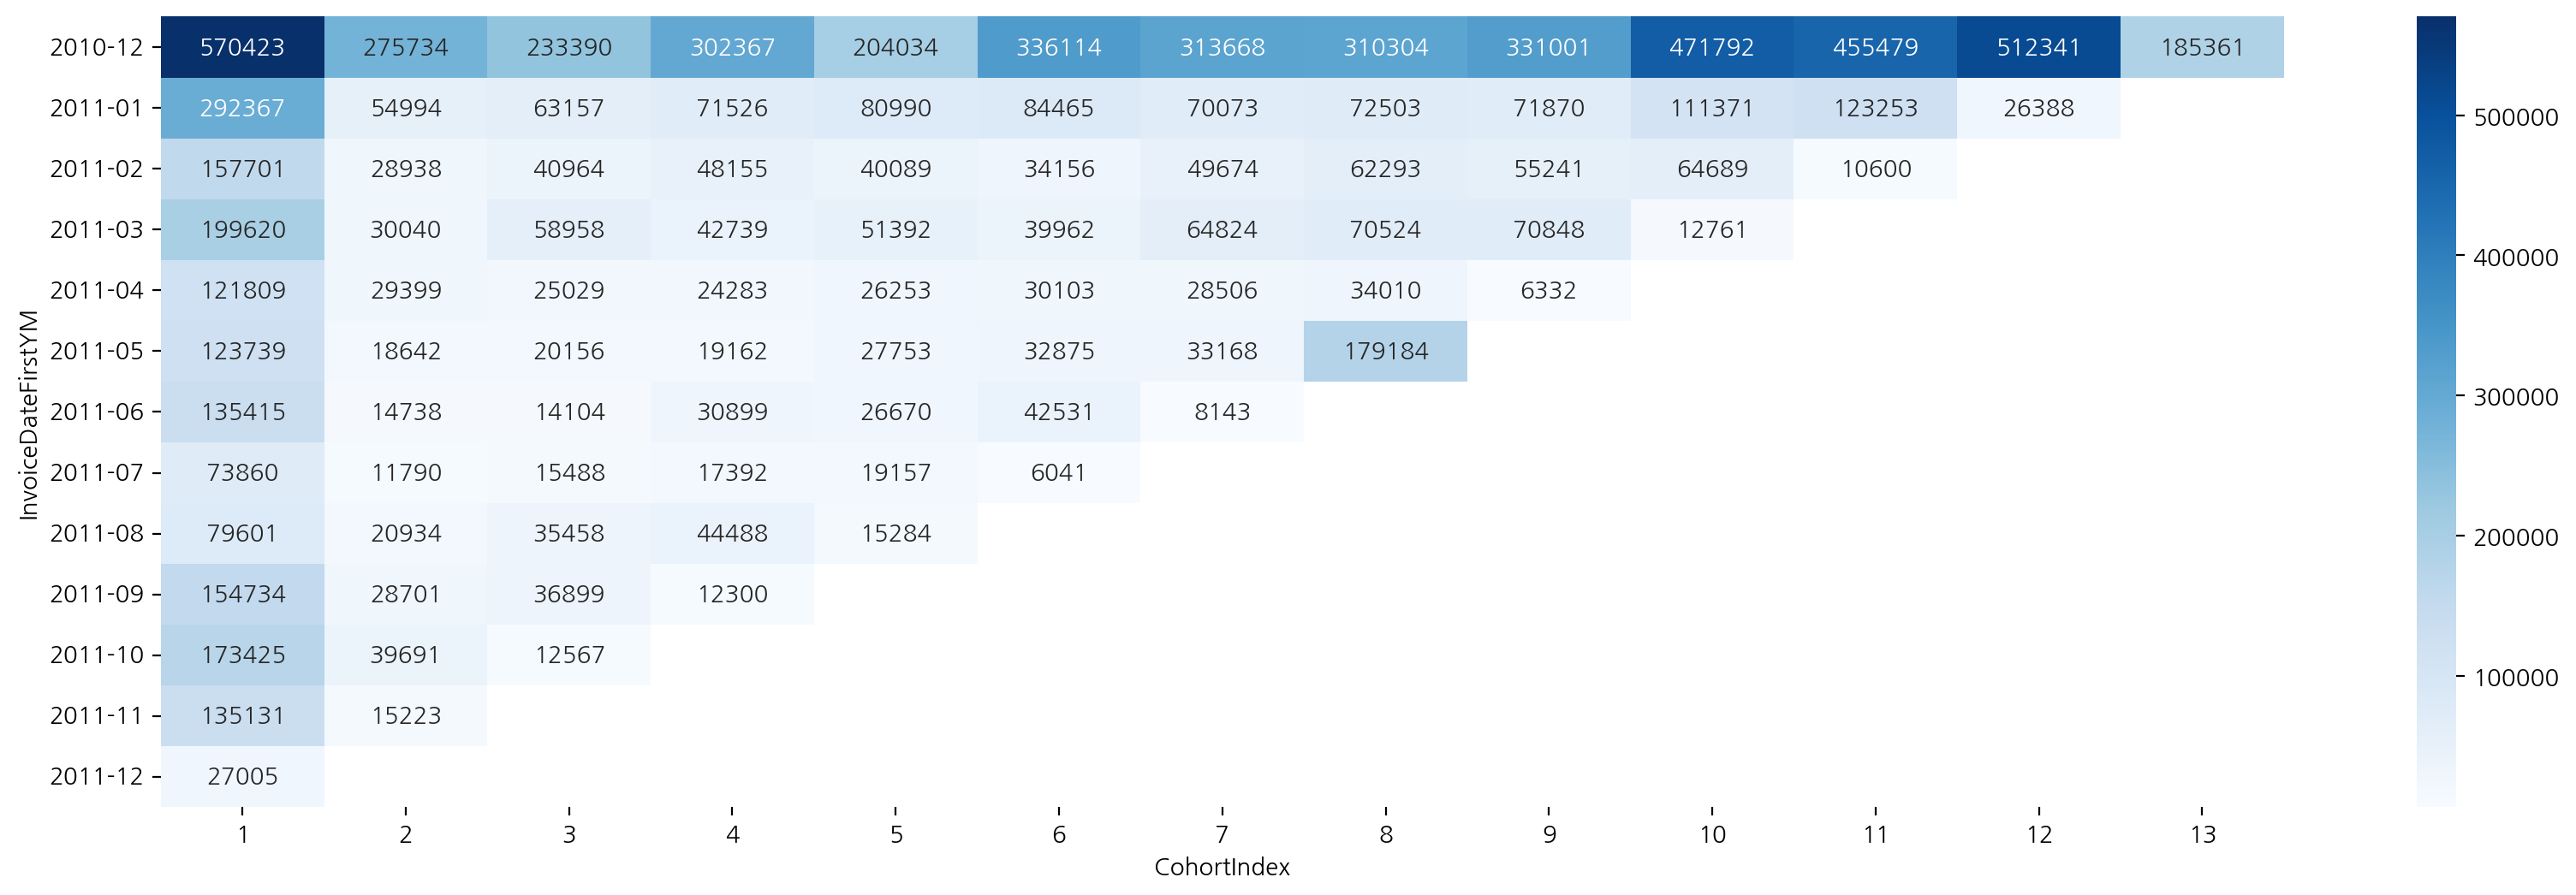

In [121]:
plt.figure(figsize=(20,6))
sns.heatmap(cohort_total_price, cmap='Blues', annot=True, fmt=".0f")